IMPORT REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
from imageio import imread

import warnings
warnings.filterwarnings("ignore")

IMPORT DATASET

In [2]:
xdf = pd.read_csv("games.csv")

In [3]:
xdf

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [4]:
xdf.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [5]:
xdf.shape

(1512, 14)

1512 rows of data and 14 variables

In [6]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


Removing unnecessary columns/variables

In [7]:
dataG = xdf[[
      'Title',
      'Release Date',
      'Number of Reviews',
      'Genres',
      'Summary',
      'Reviews',
      'Rating',
      'Playing',
      'Backlogs',
      'Wishlist',
      'Plays']]
dataG.head()

,Title,Release Date,Number of Reviews,Genres,Summary,Reviews,Rating,Playing,Backlogs,Wishlist,Plays
0,Elden Ring,"Feb 25, 2022",3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",4.5,3.8K,4.6K,4.8K,17K
1,Hades,"Dec 10, 2019",2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,4.3,3.2K,6.3K,3.6K,21K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,4.4,2.5K,5K,2.6K,30K
3,Undertale,"Sep 15, 2015",3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,4.2,679,4.9K,1.8K,28K
4,Hollow Knight,"Feb 24, 2017",3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",4.4,2.4K,8.3K,2.3K,21K


DATA CLEANING (Handling of NULL rows)

In [8]:
dataG.isnull().sum()

Title                 0
Release Date          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Rating               13
Playing               0
Backlogs              0
Wishlist              0
Plays                 0
dtype: int64

In [9]:
dataG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Number of Reviews  1512 non-null   object 
 3   Genres             1512 non-null   object 
 4   Summary            1511 non-null   object 
 5   Reviews            1512 non-null   object 
 6   Rating             1499 non-null   float64
 7   Playing            1512 non-null   object 
 8   Backlogs           1512 non-null   object 
 9   Wishlist           1512 non-null   object 
 10  Plays              1512 non-null   object 
dtypes: float64(1), object(10)
memory usage: 130.1+ KB


In [10]:
#removing rows with NULL value
#for example, games with no reviews

In [11]:
#drop all NULL values
dataG=dataG.dropna()

#reset index rows of dataframe to avoid non-consecutive index values
dataG=dataG.reset_index(drop=True)

print(f"Shape of new dataset is: {dataG.shape}")

Shape of new dataset is: (1499, 11)


In [12]:
#there were 13 rows wil null values
#Double checking if there are any null values left in the dataset
dataG.isnull().values.any()


False

DATA CLEANING

Changing of String release of Date to integer datatype with year only

In [13]:
#Extract year from release data and drop Release date column
import datetime

def extract_year(date_str):
    try:
        date_object = datetime.datetime.strptime(date_str, "%b %d, %Y")
        return date_object.year
    except ValueError:
        return pd.NA  # Handle potential format errors (optional)

dataG['Year'] = dataG['Release Date'].apply(extract_year)
#dataG.drop('Release Date',axis=1) 
data=dataG.drop('Release Date',axis=1) 
data.head()

,Title,Number of Reviews,Genres,Summary,Reviews,Rating,Playing,Backlogs,Wishlist,Plays,Year
0,Elden Ring,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",4.5,3.8K,4.6K,4.8K,17K,2022
1,Hades,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,4.3,3.2K,6.3K,3.6K,21K,2019
2,The Legend of Zelda: Breath of the Wild,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,4.4,2.5K,5K,2.6K,30K,2017
3,Undertale,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,4.2,679,4.9K,1.8K,28K,2015
4,Hollow Knight,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",4.4,2.4K,8.3K,2.3K,21K,2017


In [14]:
data.isnull().values.any()

True

In [15]:
#Release date column contain strings with "releases on TBD" which means the game has not been released yet
#extracting the year from this column cause this string value to be null and now we also have to remove the rows containing it
#drop all NULL values
data=data.dropna()

#reset index rows of datframe to avoid non-consecutive index values
data=data.reset_index(drop=True)

#convert date column from string to int
data['Year']=data['Year'].astype(int)
#df['points'] = df['points'].astype(str).astype(int)

print(f"Shape of new dataset is: {data.shape}")


Shape of new dataset is: (1497, 11)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1497 non-null   object 
 1   Number of Reviews  1497 non-null   object 
 2   Genres             1497 non-null   object 
 3   Summary            1497 non-null   object 
 4   Reviews            1497 non-null   object 
 5   Rating             1497 non-null   float64
 6   Playing            1497 non-null   object 
 7   Backlogs           1497 non-null   object 
 8   Wishlist           1497 non-null   object 
 9   Plays              1497 non-null   object 
 10  Year               1497 non-null   int32  
dtypes: float64(1), int32(1), object(9)
memory usage: 122.9+ KB


Changing of string values to integers value for numerical variables

In [17]:
# Converts the numbers with K to multiple by 1000 and convert into whole integers since K = 1000. Eg. 1K = 1 * 1000
def extract_value(value_str):
    if value_str.upper().endswith('K'):
        value_str = value_str[:-1]
        value_num = float(value_str) * 1000
    else:
        value_num = float(value_str)
    return value_num


Combining columns/variables to create new variables

In [18]:
games_clean = data.copy()

#replaces K for 1000
games_clean["Backlogs"] = games_clean["Backlogs"].str.replace("K","000")
games_clean["Backlogs"] = games_clean["Backlogs"].str.replace(".","")
games_clean["Wishlist"] = games_clean["Wishlist"].str.replace("K","000")
games_clean["Wishlist"] = games_clean["Wishlist"].str.replace(".","")

games_clean[['Backlogs', 'Wishlist']] = games_clean[['Backlogs', 'Wishlist']].apply(pd.to_numeric)

#combines column backlogs and wishlist
#for people who are interested
games_clean['Interested'] = games_clean["Backlogs"] + games_clean["Wishlist"]
games_clean['Playing']=games_clean['Playing'].apply(extract_value)
games_clean['Total Plays']=games_clean['Plays'].apply(extract_value)
games_clean['Review_count']=games_clean['Number of Reviews'].apply(extract_value)

#convert to float (except year) for consistency
games_clean['Playing']=games_clean['Playing'].astype(float)
games_clean['Interested']=games_clean['Interested'].astype(float)
games_clean['Total Plays']=games_clean['Total Plays'].astype(float)
games_clean['Review_count']=games_clean['Review_count'].astype(float)

#removes Playing, Backlogs, and Wishlist from df
games_clean.pop("Backlogs")
games_clean.pop("Wishlist")
#games_clean.pop("Playing")
games_clean.pop("Plays")
games_clean.pop("Number of Reviews")


games_clean.head()

,Title,Genres,Summary,Reviews,Rating,Playing,Year,Interested,Total Plays,Review_count
0,Elden Ring,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",4.5,3800.0,2022,94000.0,17000.0,3900.0
1,Hades,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,4.3,3200.0,2019,99000.0,21000.0,2900.0
2,The Legend of Zelda: Breath of the Wild,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,4.4,2500.0,2017,31000.0,30000.0,4300.0
3,Undertale,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,4.2,679.0,2015,67000.0,28000.0,3500.0
4,Hollow Knight,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",4.4,2400.0,2017,106000.0,21000.0,3000.0


In [19]:
# Check if there are any other NULL values
games_clean.info()
games_clean.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1497 non-null   object 
 1   Genres        1497 non-null   object 
 2   Summary       1497 non-null   object 
 3   Reviews       1497 non-null   object 
 4   Rating        1497 non-null   float64
 5   Playing       1497 non-null   float64
 6   Year          1497 non-null   int32  
 7   Interested    1497 non-null   float64
 8   Total Plays   1497 non-null   float64
 9   Review_count  1497 non-null   float64
dtypes: float64(5), int32(1), object(4)
memory usage: 111.2+ KB


False

Adding columns from another column/variable for easier usage of data

In [20]:
split_Genres = games_clean.copy()

unique_genres = set()
for genres_str in split_Genres['Genres']:
    genres_list = eval(genres_str)  # Convert string representation of list to actual list
    unique_genres.update(genres_list)

# Create new columns for each unique genre
for genre in unique_genres:
    split_Genres[genre] = 0

# Iterate over each row to populate the new genre columns
for index, row in games_clean.iterrows():
    genres_list = eval(row['Genres'])  # Convert string representation of list to actual list
    for genre in genres_list:
        split_Genres.at[index, genre] = 1
        
#drop genre column
#split_Genres.pop("Genres")

In [21]:
#Check if there are any empty info in the data.
games_clean.isna().sum()

Title           0
Genres          0
Summary         0
Reviews         0
Rating          0
Playing         0
Year            0
Interested      0
Total Plays     0
Review_count    0
dtype: int64

In [22]:
games_clean=split_Genres.copy()

NLP Part

Cleaning text from random unicode characters (In this case is the []), and keeping only letters, numbers, spaces. Applies to summary and reviews

In [23]:
def decode(column):
    column = column.str.decode("unicode_escape")\
    .str.replace(r'[^a-zA-Z1-9\ ]', '', regex=True).str.strip()
    return column

In [24]:
games_clean.loc[:,"Summary"] = decode(games_clean["Summary"])
games_clean.loc[:,"Reviews"] = decode(games_clean["Reviews"])

This part of the code removes ONLY completely non-english reviews, basically games with reviews that does not contain english. Games with reviews with english reviews will still stay.
It detects which reviews are in English. Puts the english reviews in a new dataframe called english_reviews

In [25]:
# Function to detect the language of a review using langid with confidence threshold
def detect_language_with_langdetect(line): 
    from langdetect import detect_langs
    try: 
        langs = detect_langs(line) 
        for item in langs: 
            # The first one returned is usually the one that has the highest probability
            return item.lang, item.prob 
    except: return "err", 0.0 

# Apply language detection to each review and add a 'IsEnglish' column to the DataFrame
games_clean['LanguageDetection'] = games_clean['Reviews'].apply(detect_language_with_langdetect)

#Filter out non-English reviews based on the threshold
english_reviews = games_clean[games_clean['LanguageDetection'].apply(lambda x: x[0] == 'en' and x[1] >= 0.8)]
games_clean = english_reviews

# Output the results with language and confidence percentages
# for idx, (lang, confidence) in enumerate(english_reviews['LanguageDetection']):
#     print(f"Review {idx + 1}: Language={lang}, Confidence={confidence:.2%}")

# print(games_clean)

Why not remove the Spanish Words? 
The sentiment values are still valid. As long as the review contains english words, the sentiment analysis will still use those english words and evaluate whether the reviews are positive or negative. From some games (Eg. 1482, Dragon Ball GT: Final Bout), the sentiment values were below 0, indicating a negative review. Although these reviews contained spanish words, the sentiment values were still correct judging by the english sentences that were in these reviews.

To make the sentiment value more useful, we will find games that are above 4.0 rating containing the top words from the summary of games extracted from positive reviews. This will give us a more accurate result of what are the top and popular/highly rated games the people are looking out for.

In [26]:
games_clean.tail(20)

,Title,Genres,Summary,Reviews,Rating,Playing,Year,Interested,Total Plays,Review_count,...,Indie,Quiz/Trivia,Adventure,Platform,Pinball,Fighting,Card & Board Game,MOBA,Tactical,LanguageDetection
1477,Sonic the Hedgehog 2,"['Adventure', 'Arcade', 'Platform']",This is a completely different game than its 1...,Played as part of Sonic Gems Collection on the...,2.8,6.0,1992,218.0,1400.0,157.0,...,0,0,1,1,0,0,0,0,0,"(en, 0.9999948389238523)"
1478,Guitar Hero 5,['Music'],Guitar Hero 5 initially referred to as Guitar ...,Its a game Its guitar hero If you like guitar ...,3.2,0.0,2009,87.0,1100.0,63.0,...,0,0,0,0,0,0,0,0,0,"(en, 0.9999953765816193)"
1479,Silent Hill: Homecoming,"['Adventure', 'Fighting']",Silent Hill Homecoming is the sixth installmen...,i feel offended Every 5 years I give it anothe...,2.1,18.0,2008,609.0,1300.0,206.0,...,0,0,1,0,0,1,0,0,0,"(en, 0.9999980425016111)"
1480,Mighty No. 9,"['Adventure', 'Arcade', 'Platform', 'Shooter']",Mighty No 9 is focused on 2D platforming with ...,Id rather have nothing Better than nothing I f...,1.6,5.0,2016,334.0,907.0,137.0,...,0,0,1,1,0,0,0,0,0,"(en, 0.9999956565858883)"
1481,FIFA 13,"['Simulator', 'Sport']",FIFA 13 captures the drama and unpredictabilit...,Best FIFA First FIFA part that I played on an ...,3.2,2.0,2012,46.0,1600.0,62.0,...,0,0,0,0,0,0,0,0,0,"(en, 0.9999977123304531)"
1482,Dragon Ball GT: Final Bout,['Fighting'],After achieving cult hit status around the glo...,One of the worst fighting games Ive ever playe...,1.8,2.0,1997,62.0,1200.0,83.0,...,0,0,0,0,0,1,0,0,0,"(en, 0.9999967612112797)"
1483,Killzone 3,['Shooter'],Killzone 3 is the fourth game in the Killzone ...,Played the beta on a friends ps3 and thought t...,3.1,6.0,2011,340.0,1300.0,155.0,...,0,0,0,0,0,0,0,0,0,"(en, 0.9999977259848106)"
1484,WWE SmackDown vs. Raw 2008,"['Fighting', 'Sport']",The 28 edition in the Smackdown vs Raw series ...,The earliest memory I have of this game was wi...,3.1,1.0,2007,50.0,1400.0,62.0,...,0,0,0,0,0,1,0,0,0,"(en, 0.9999977121824015)"
1485,Children of Morta,"['Adventure', 'Indie', 'RPG']",Children of Morta is a narrative driven hack a...,Its a reasonably solid roguelite RPG The story...,3.4,54.0,2019,521.0,727.0,153.0,...,1,0,1,0,0,0,0,0,0,"(en, 0.9999975763537916)"
1486,The Godfather,"['Adventure', 'Racing', 'Shooter']",The Godfather puts you into the action of the ...,juego para pibes cine 2 esta mierda es mejor q...,3.6,2.0,2006,332.0,1100.0,121.0,...,0,0,1,0,0,0,0,0,0,"(en, 0.9999951895509325)"


Resets the index after cleaning of random unicode characters is done

In [27]:
games_clean.reset_index(inplace=True, drop=True)
games_clean.head()

,Title,Genres,Summary,Reviews,Rating,Playing,Year,Interested,Total Plays,Review_count,...,Indie,Quiz/Trivia,Adventure,Platform,Pinball,Fighting,Card & Board Game,MOBA,Tactical,LanguageDetection
0,Elden Ring,"['Adventure', 'RPG']",Elden Ring is a fantasy action and open world ...,The first playthrough of elden ring is one of ...,4.5,3800.0,2022,94000.0,17000.0,3900.0,...,0,0,1,0,0,0,0,0,0,"(en, 0.9999974439278215)"
1,Hades,"['Adventure', 'Brawler', 'Indie', 'RPG']",A roguelite hack and slash dungeon crawler in ...,convinced this is a roguelike for people who d...,4.3,3200.0,2019,99000.0,21000.0,2900.0,...,1,0,1,0,0,0,0,0,0,"(en, 0.9999961067134613)"
2,Undertale,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A small child falls into the Underground where...,soundtrack is tied for 1 with nier automata a...,4.2,679.0,2015,67000.0,28000.0,3500.0,...,1,0,1,0,0,0,0,0,0,"(en, 0.9999977343636977)"
3,Hollow Knight,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,this games worldbuilding is incredible with it...,4.4,2400.0,2017,106000.0,21000.0,3000.0,...,1,0,1,1,0,0,0,0,0,"(en, 0.9999971866450201)"
4,Minecraft,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it Unfortunately...,4.3,1800.0,2011,11230.0,33000.0,2300.0,...,0,0,1,0,0,0,0,0,0,"(en, 0.8571394849144741)"


Processes incoming text data using spacy to determine the base form of each word in summary & reviews, then returns a list of lemmatized words.  
Lemmatized words are one single form word.
Eg.  "builds", "building",or "built" to the lemma "build"

In [28]:
nlp = spacy.load('en_core_web_sm')

def lemmatize(text):
    doc = nlp(text)
    tokens = [token for token in doc if not token.is_punct]
    lemmas = [token.lemma_ if token.pos_ != 'PRON' else token.orth_ for token in tokens]
    return lemmas

# games_clean['Reviews'] = games_clean['Reviews'].apply(lemmatize)

Here, we are using TextBlob to indicate whether the reviews in the dataset lean towards positive or negative. 
If a sentiment value is above 0, it means it is a positive review.
If it's below 0, it indicates a negative value.
The range of sentiment value is [-1, 1]. The value that is closer to -1 or 1 indicates stronger positive/negative sentiments.

In [29]:
from textblob import TextBlob

# Function to calculate sentiment polarity using TextBlob
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply sentiment analysis to each review and add a 'Sentiment' column to the DataFrame
games_clean['Sentiment'] = games_clean['Reviews'].apply(get_sentiment)

# Filter positive reviews based on sentiment polarity
positive_reviews = games_clean[games_clean['Sentiment'] > 0]['Reviews']

Converts text data to TF-IDF vectors.
 
TF-IDF is a measure that "evaluates how relevant a word is to a document in a collection of documents". It increases proportionally to the number of times a word appears in a dataset, but is offset by the number of datasets that contain the word.
Example: Words that are common in every document, such as this, what, and if, rank low even though they may appear many times, since they don’t mean much to that document in particular.

This code creates a matrix with TF-IDF weights for each word. 
Obtains a list of feature names that represent which words are included in these vectors. 

Instead of comparing multiple datasets, will try comparing between reviews and summary to determine the relevancy of the words. From there, can roughly determine which words are relevant and appear very frequently, giving us a gauge of what kind of games people usually prefer and what kind of audience the games generally cater to.

Now let's do it for reviews. Here we are using only positive reviews to get a gauge of what kind of games people usually praise


In [30]:
tfidf_positive = TfidfVectorizer(stop_words="english", tokenizer=lemmatize) #Reduces common words like 'and', 'the' etc as it is not significant.
tfidf_matrix_positive = tfidf_positive.fit_transform(positive_reviews)
feature_names_positive = tfidf_positive.get_feature_names_out()

In [31]:
# Calculate TF-IDF scores for each word in the positive reviews.
tfidf_scores_positive = tfidf_matrix_positive.sum(axis=0)

# Create a DataFrame to display common words and their TF-IDF scores in positive reviews.
common_words_positive = pd.DataFrame(tfidf_scores_positive, columns=feature_names_positive).transpose()
common_words_positive.columns = ['TF-IDF Score']

# Filter out empty strings and whitespace characters.
common_words_positive = common_words_positive[common_words_positive.index.str.strip() != '']

# Filter out specifc number of letters from words. 4 because 1-4 words usually consists of generic words that are redundant.
common_words_positive = common_words_positive[common_words_positive.index.str.len() > 4]

# Sort the DataFrame by TF-IDF score in descending order.
common_words_positive = common_words_positive.sort_values(by='TF-IDF Score', ascending=False)

# Display top common words without blank spaces and single-letter words.
top_common_words_positive = common_words_positive.head(20)
print(top_common_words_positive)

            TF-IDF Score
really         34.723681
story          30.304745
great          27.638009
character      24.792470
gameplay       23.409102
think          21.799889
pretty         20.268620
level          19.998116
world          17.373745
series         16.892333
mario          16.811614
design         16.804446
combat         16.738941
experience     16.307745
thing          14.513238
little         13.817848
amazing        13.593708
enjoy          13.582006
favorite       13.398540
original       12.824998


The code below extracts key words from Summary. The summary selected are from the positive reviews that we have identified previously. This would give a better gauge of what types of games the people are favouring based on the summary of the game description.

In [32]:
# Filter games with positive reviews.
positive_games = games_clean[games_clean['Sentiment'] > 0]

# Extract Summary text from games with positive reviews
positive_summary_text = positive_games['Summary']

In [33]:
tfidf_positive_summary = TfidfVectorizer(stop_words="english", tokenizer=lemmatize)
tfidf_matrix_positive_summary = tfidf_positive_summary.fit_transform(positive_summary_text)
feature_names_positive_summary = tfidf_positive_summary.get_feature_names_out()

In [34]:
non_empty_feature_indices = [i for i, name in enumerate(feature_names_positive_summary) if name.strip() != '']

# Filter the TF-IDF matrix and feature names
tfidf_matrix_filtered = tfidf_matrix_positive_summary[:, non_empty_feature_indices]
feature_names_filtered = [feature_names_positive_summary[i] for i in non_empty_feature_indices]

In [35]:
# Calculate TF-IDF scores for each word in the positive summary text
tfidf_scores_positive_summary = tfidf_matrix_positive_summary.sum(axis=0)

# Create a DataFrame to display common words and their TF-IDF scores in positive summary text
common_words_positive_summary = pd.DataFrame(tfidf_scores_positive_summary, columns=feature_names_positive_summary).transpose()
common_words_positive_summary.columns = ['TF-IDF Score']

# Filter out empty strings and whitespace characters (optional)
common_words_positive_summary = common_words_positive_summary[common_words_positive_summary.index.str.strip() != '']

# Filter out specific number of letters from words (optional)
common_words_positive_summary = common_words_positive_summary[common_words_positive_summary.index.str.len() > 4]

# Sort the DataFrame by TF-IDF score
common_words_positive_summary = common_words_positive_summary.sort_values(by='TF-IDF Score', ascending=False)

# Display the top common words in positive summary text without blank spaces and single-letter words
top_common_words_positive_summary = common_words_positive_summary.head(20)
print(top_common_words_positive_summary)

            TF-IDF Score
player         29.810632
world          27.468608
character      20.232183
story          19.990161
mario          18.505882
series         18.255552
feature        18.166316
adventure      17.952568
pokmon         16.100201
action         15.951831
experience     15.557341
fight          15.260412
battle         14.711711
gameplay       14.575486
explore        13.716077
enemy          12.769540
combat         12.442247
super          12.015713
version        11.897888
release        11.504309


In [36]:
positive_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 1410
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1182 non-null   object 
 1   Genres               1182 non-null   object 
 2   Summary              1182 non-null   object 
 3   Reviews              1182 non-null   object 
 4   Rating               1182 non-null   float64
 5   Playing              1182 non-null   float64
 6   Year                 1182 non-null   int32  
 7   Interested           1182 non-null   float64
 8   Total Plays          1182 non-null   float64
 9   Review_count         1182 non-null   float64
 10  Simulator            1182 non-null   int64  
 11  Music                1182 non-null   int64  
 12  RPG                  1182 non-null   int64  
 13  Visual Novel         1182 non-null   int64  
 14  Strategy             1182 non-null   int64  
 15  Brawler              1182 non-null   i

# Model Training for Clustering

In [37]:
from sklearn.cluster import KMeans

# Step 3: Feature Selection
features = positive_games[['Rating', 
                 'Interested', 
                 'Playing']]

# Use K-means clustering to identify groups of similar games based on the selected features
kmeans = KMeans(n_clusters=3, random_state=42)
#pipeline = make_pipeline(StandardScaler(), kmeans)
kmeans.fit(features)
#clusters = pipeline.fit_predict(features)
cluster3_1 = kmeans.predict(features)

According to the correlation matrix, The players who are interested but have not played the game and the people who are currently still playing the game have a moderately positive strong relation R=0.65
That means, the more people who are interested in playing the game, the more people who would be currently playing in this period of time. 
Regardless of the weak relationship between Ratings and these 2 variables, I wanted to use them in a cluster together to provide insight into the game's current success via players still playing their game and their rating (performance and appeal) while also looking for its growth potential.
Games with high player engagement and a large number of interested players may represent high-demand titles.

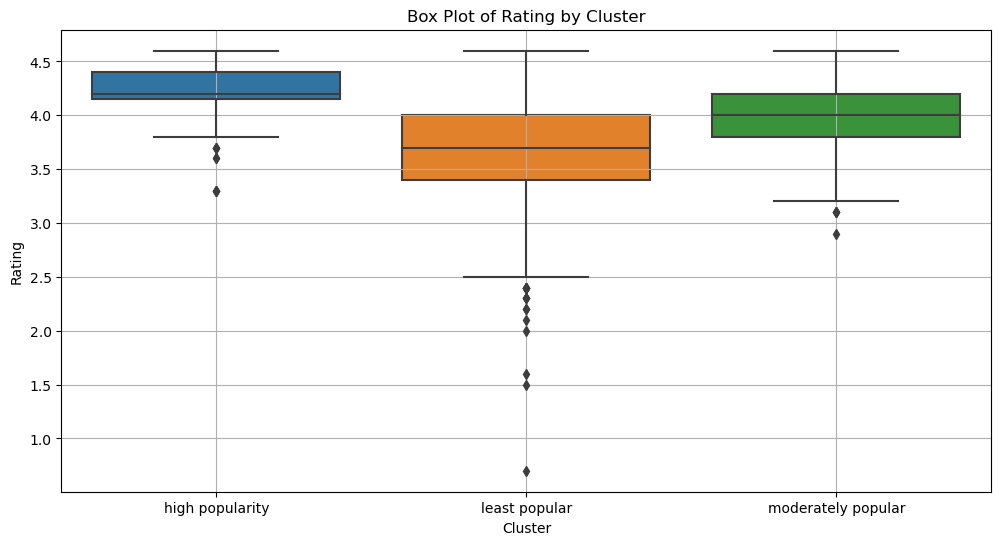

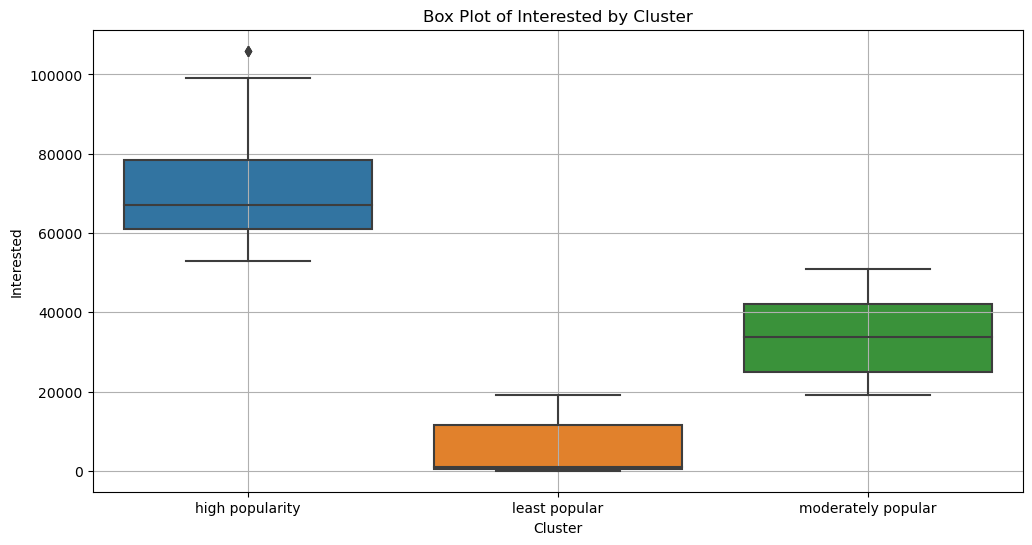

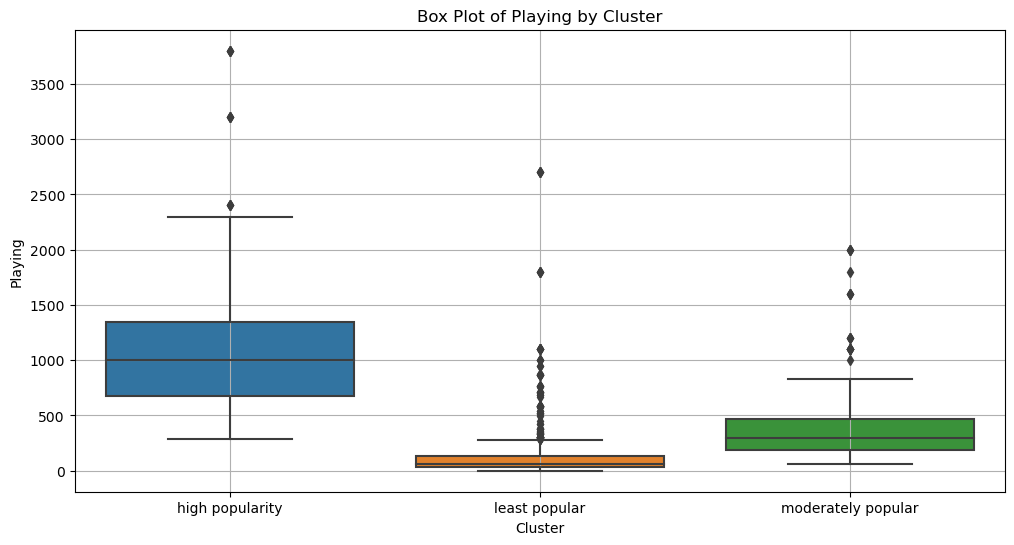

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cluster_labels = {0: 'least popular', 1: 'moderately popular', 2: 'high popularity'}

positive_games['cluster3_1']=cluster3_1
# Create box plots for each feature, grouped by cluster
for feature in features:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=positive_games['cluster3_1'].map(cluster_labels), y=feature, data=positive_games)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

I chose to have 3 groups for the cluster to represent 3 things

0. Games that have no player engagement or potentially just niche games (due to a low number of potential players), furthermore with mixed or mostly low ratings compared to the other games
1. Moderately Engaged games with growth potential. This group has moderate player engagement and a moderate number of people who are interested in playing while having mixed ratings with mostly high ratings compared to the rest of the games
2. Games that are Highly engage and have strong interest from potential players while also performing well with high ratings
Games from group 0 are likely to have limited success in the market. These games have low player engagement and a small number of potential players interested in playing them. Furthermore, their mixed or mostly low ratings suggest that they may not appeal to a broad audience and may be considered niche or less popular games.

Group 1 represents games with moderate player engagement and growth potential. While these games may not have the same level of success as those in Group 2, they still have a decent level of player engagement and interest from potential players. Their mixed ratings indicate that they have potential for improvement and could attract a larger audience with targeted marketing or updates.

Games from group 2 represent strong candidates for success in the market, as they have already demonstrated high levels of engagement among current players and strong interest from potential players. Additionally, their positive ratings indicate that they are well-received by players, further increasing their likelihood of success.

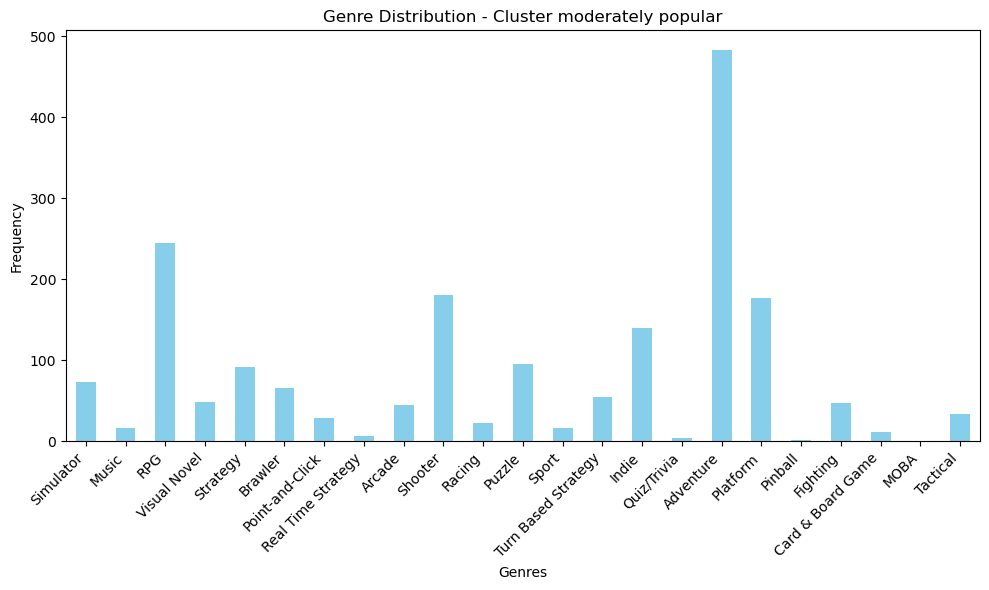

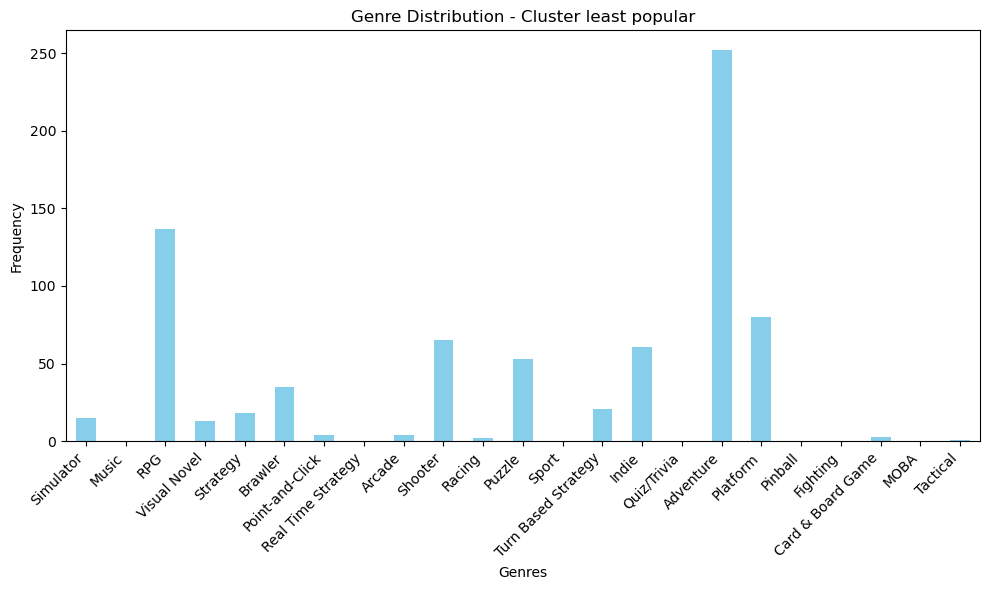

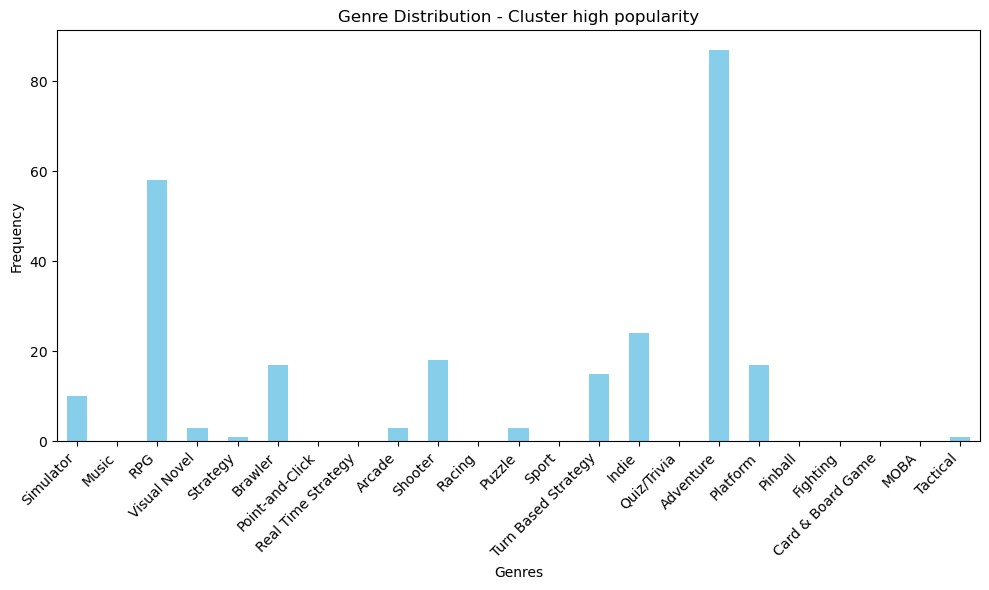

In [99]:
genre_columns = positive_games.columns[10:33]#first genre in col 10 to col 33
genre_data = positive_games[genre_columns]
grouped_data = positive_games.groupby('cluster3_1')

# Plot bar charts for each cluster
for cluster, group in grouped_data:
    # Calculate genre frequencies within the cluster
    cluster_genre_frequencies = group[genre_columns].sum()
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    cluster_genre_frequencies.plot(kind='bar', color='skyblue')
    
    # Customize plot labels and title
    plt.title(f'Genre Distribution - Cluster {cluster_labels[cluster]}')
    plt.xlabel('Genres')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap of labels
    plt.show()

In [100]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features, cluster3_1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6706214363777218


 The silhouette score measures how well-separated the clusters are. It ranges from -1 to 1, where a score closer to 1 indicates that data points are well-clustered, a score around 0 suggests overlapping clusters, and negative scores indicate that data points may have been assigned to the wrong clusters.
 
A silhouette score of 0.67 indicates a relatively good clustering result. It indicates that the majority of data points are well-clustered and assigned to the correct clusters, with some potential for improvement. It also suggests that the clustering algorithm has successfully separated the data into distinct clusters with relatively minimal overlap. However, further analysis and refinement may still be beneficial to optimize the clustering results.

#IMPROVING CLUSTER

I wanted to see if adding more variables for the clusters would help to separate the genres better.
hence, I decided to cluster games based on variables review count, interest level, current player count, total player count, and rating.

The first 4 variables have at least a correlation 0.65 with each other which means they are all highly correlated which indicates that they share similar patterns or trends in the data. This better ensures that games with similar levels of engagement across multiple dimensions are grouped together, leading to more cohesive and meaningful clusters.

Furthermore, by including multiple variables that measure different aspects of player engagement (reviews_count, interest, active player counts, total number of people who have played), the resulting clusters provide a more comprehensive representation of game engagement. This allows for a more nuanced understanding of player behavior and preferences.

Review count, interest level, and player counts represent different facets of a game's popularity and appeal. Review count reflects the level of feedback and attention the game has received from players, while interest level and player counts indicate the level of current and past player engagement.

Adding the rating variable to the clustering analysis, despite its low correlation with the other variables would still add value for the clustering. Ratings provide a direct measure of the perceived quality or satisfaction level of a game among players. Even if ratings are not strongly correlated with other variables such as player engagement or interest, they still offer valuable information about the overall reception and success of a game.

The 3 groups will still represent the same things as the previous cluster

In [41]:
positive_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 1410
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1182 non-null   object 
 1   Genres               1182 non-null   object 
 2   Summary              1182 non-null   object 
 3   Reviews              1182 non-null   object 
 4   Rating               1182 non-null   float64
 5   Playing              1182 non-null   float64
 6   Year                 1182 non-null   int32  
 7   Interested           1182 non-null   float64
 8   Total Plays          1182 non-null   float64
 9   Review_count         1182 non-null   float64
 10  Simulator            1182 non-null   int64  
 11  Music                1182 non-null   int64  
 12  RPG                  1182 non-null   int64  
 13  Visual Novel         1182 non-null   int64  
 14  Strategy             1182 non-null   int64  
 15  Brawler              1182 non-null   i

In [42]:
from sklearn.cluster import KMeans

# Step 3: Feature Selection
features2 = positive_games[['Rating', 
                 'Interested', 'Review_count',
                 'Playing', 'Total Plays']]

# Use K-means clustering to identify groups of similar games based on the selected features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features2)
cluster5_2 = kmeans.predict(features2)

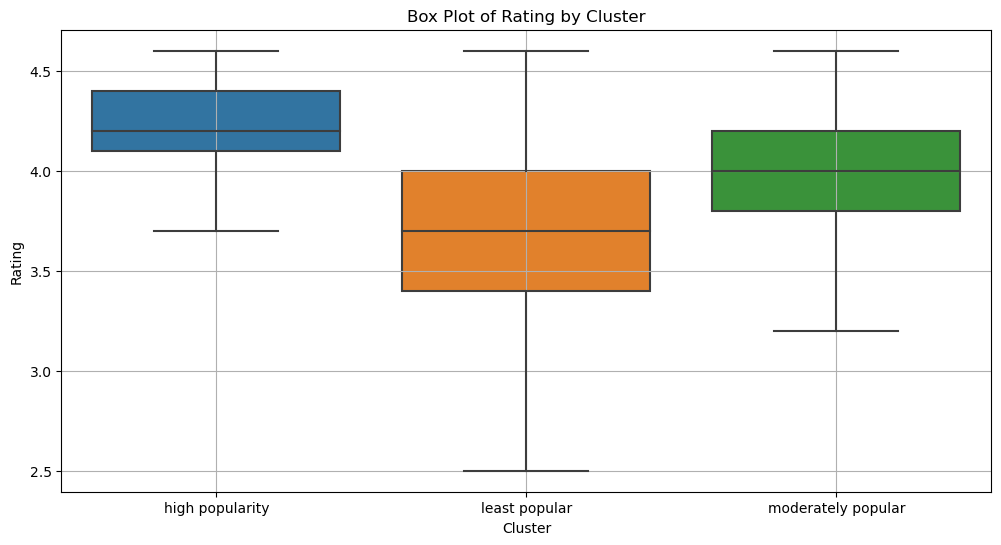

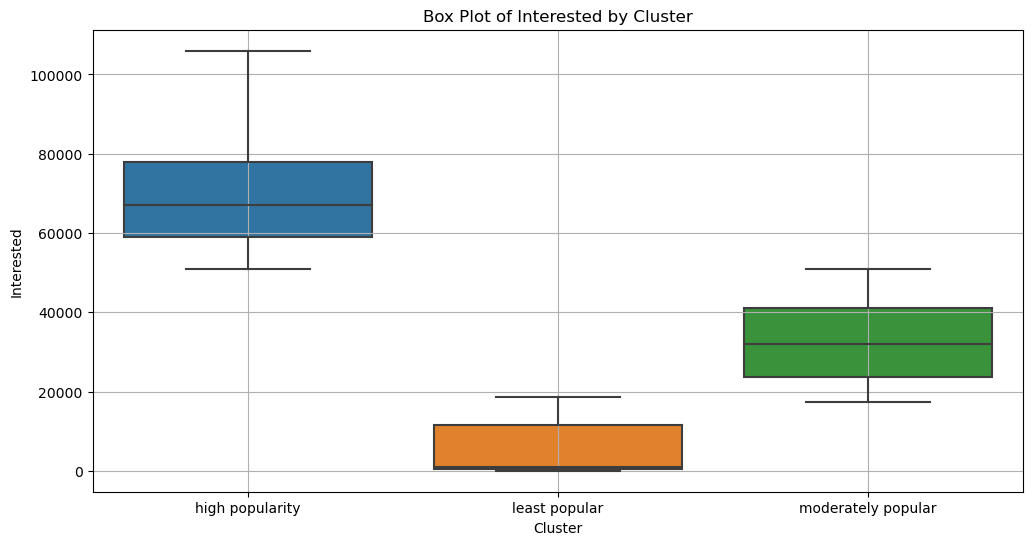

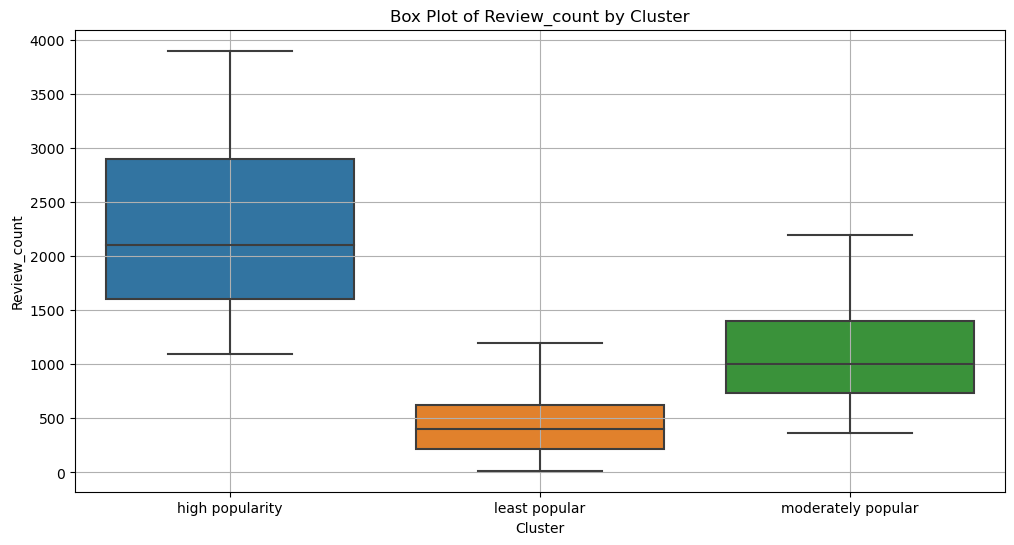

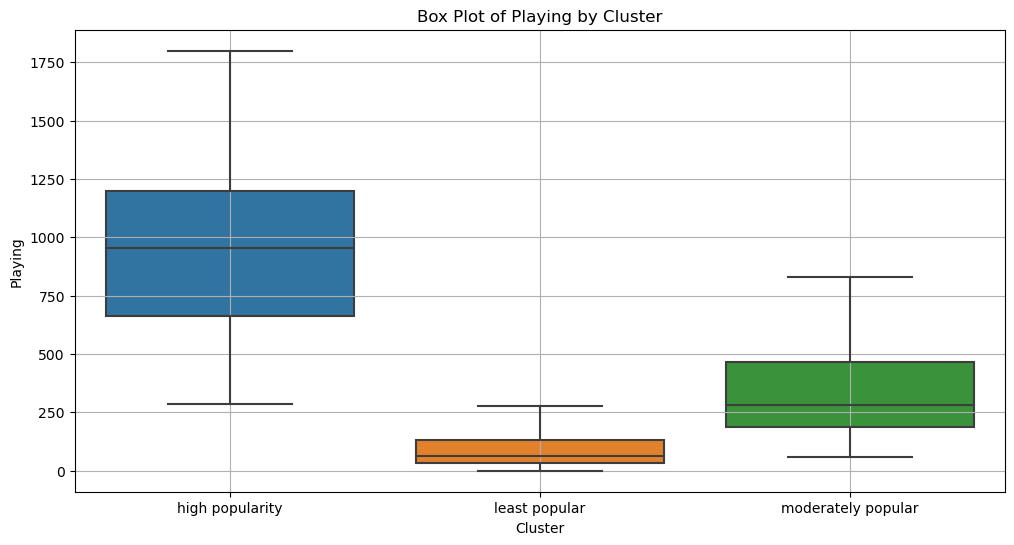

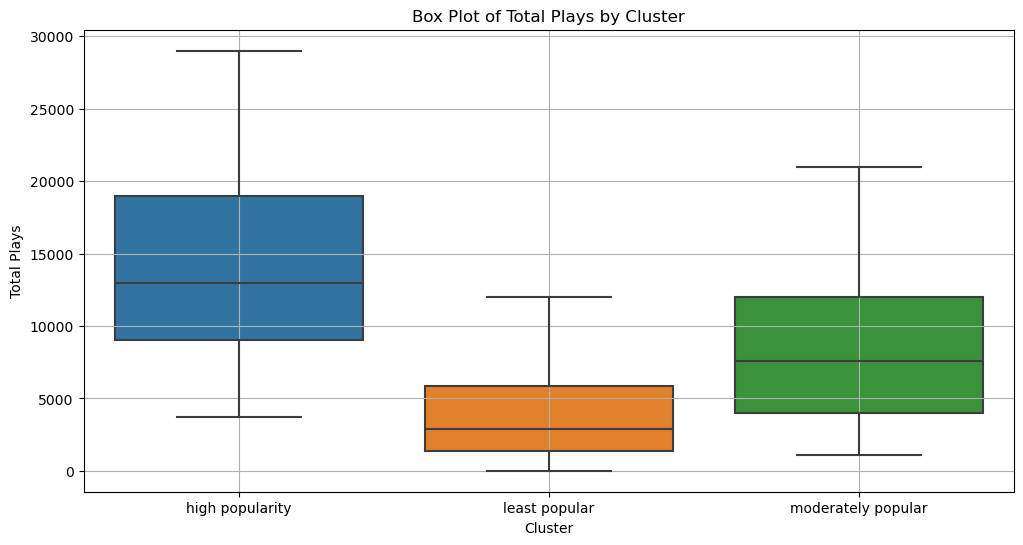

In [43]:
positive_games['cluster5_2']=cluster5_2
# Create box plots for each feature, grouped by cluster
cluster_labels = {0: 'least popular', 2: 'moderately popular', 1: 'high popularity'}

for feature in features2:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=positive_games['cluster5_2'].map(cluster_labels), y=feature, data=positive_games,showfliers=False)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

In [44]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features2, cluster5_2)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5990171104083027


I have decided to remove total plays from cluster as it is the variable with the most overlapping clusters as it lowered the silhouette score from before

In [45]:
# Step 3: Feature Selection
features3 = positive_games[['Rating', 
                 'Interested', 'Review_count',
                 'Playing']]

# Use K-means clustering to identify groups of similar games based on the selected features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features3)
cluster4_3 = kmeans.predict(features3)

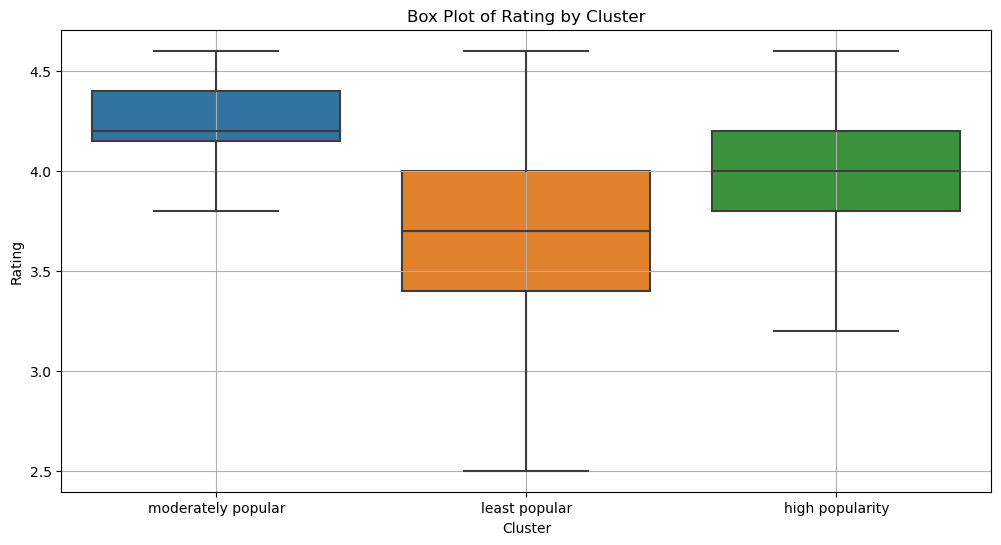

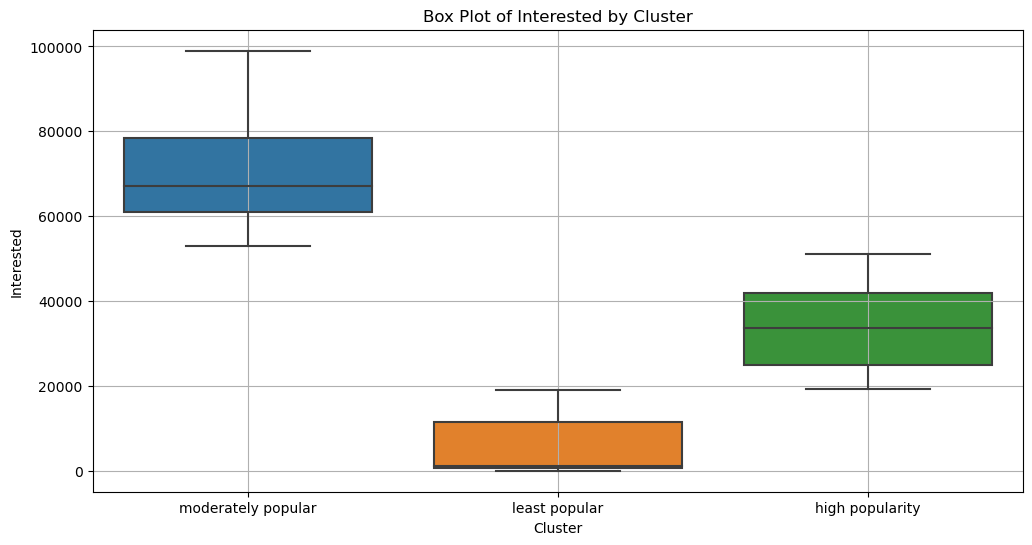

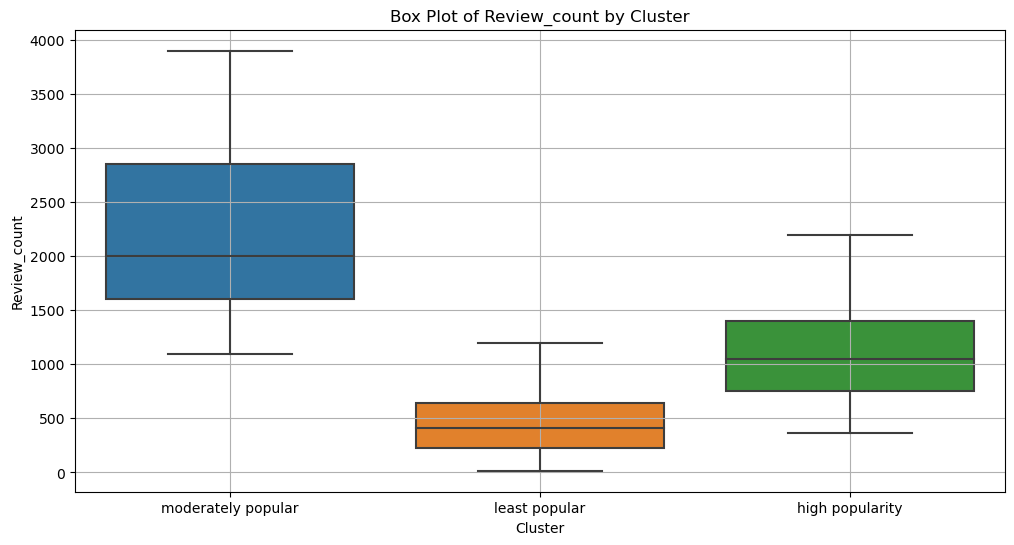

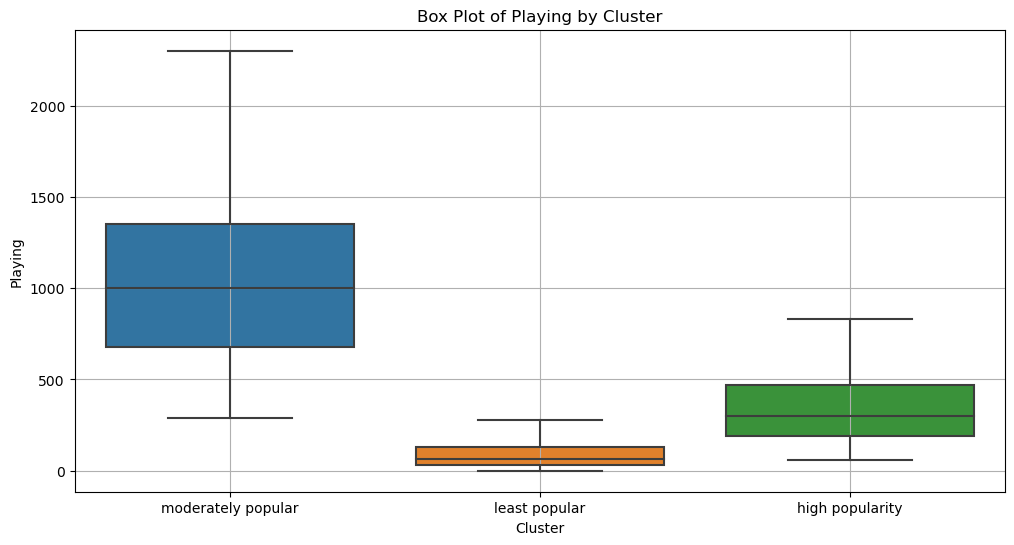

In [46]:
positive_games['cluster4_3']=cluster4_3
# Create box plots for each feature, grouped by cluster
cluster_labels = {0: 'least popular', 2: 'moderately popular', 1: 'high popularity'}

for feature in features3:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=positive_games['cluster4_3'].map(cluster_labels), y=feature, data=positive_games,showfliers=False)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

In [47]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features3, cluster4_3)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6706214363777218


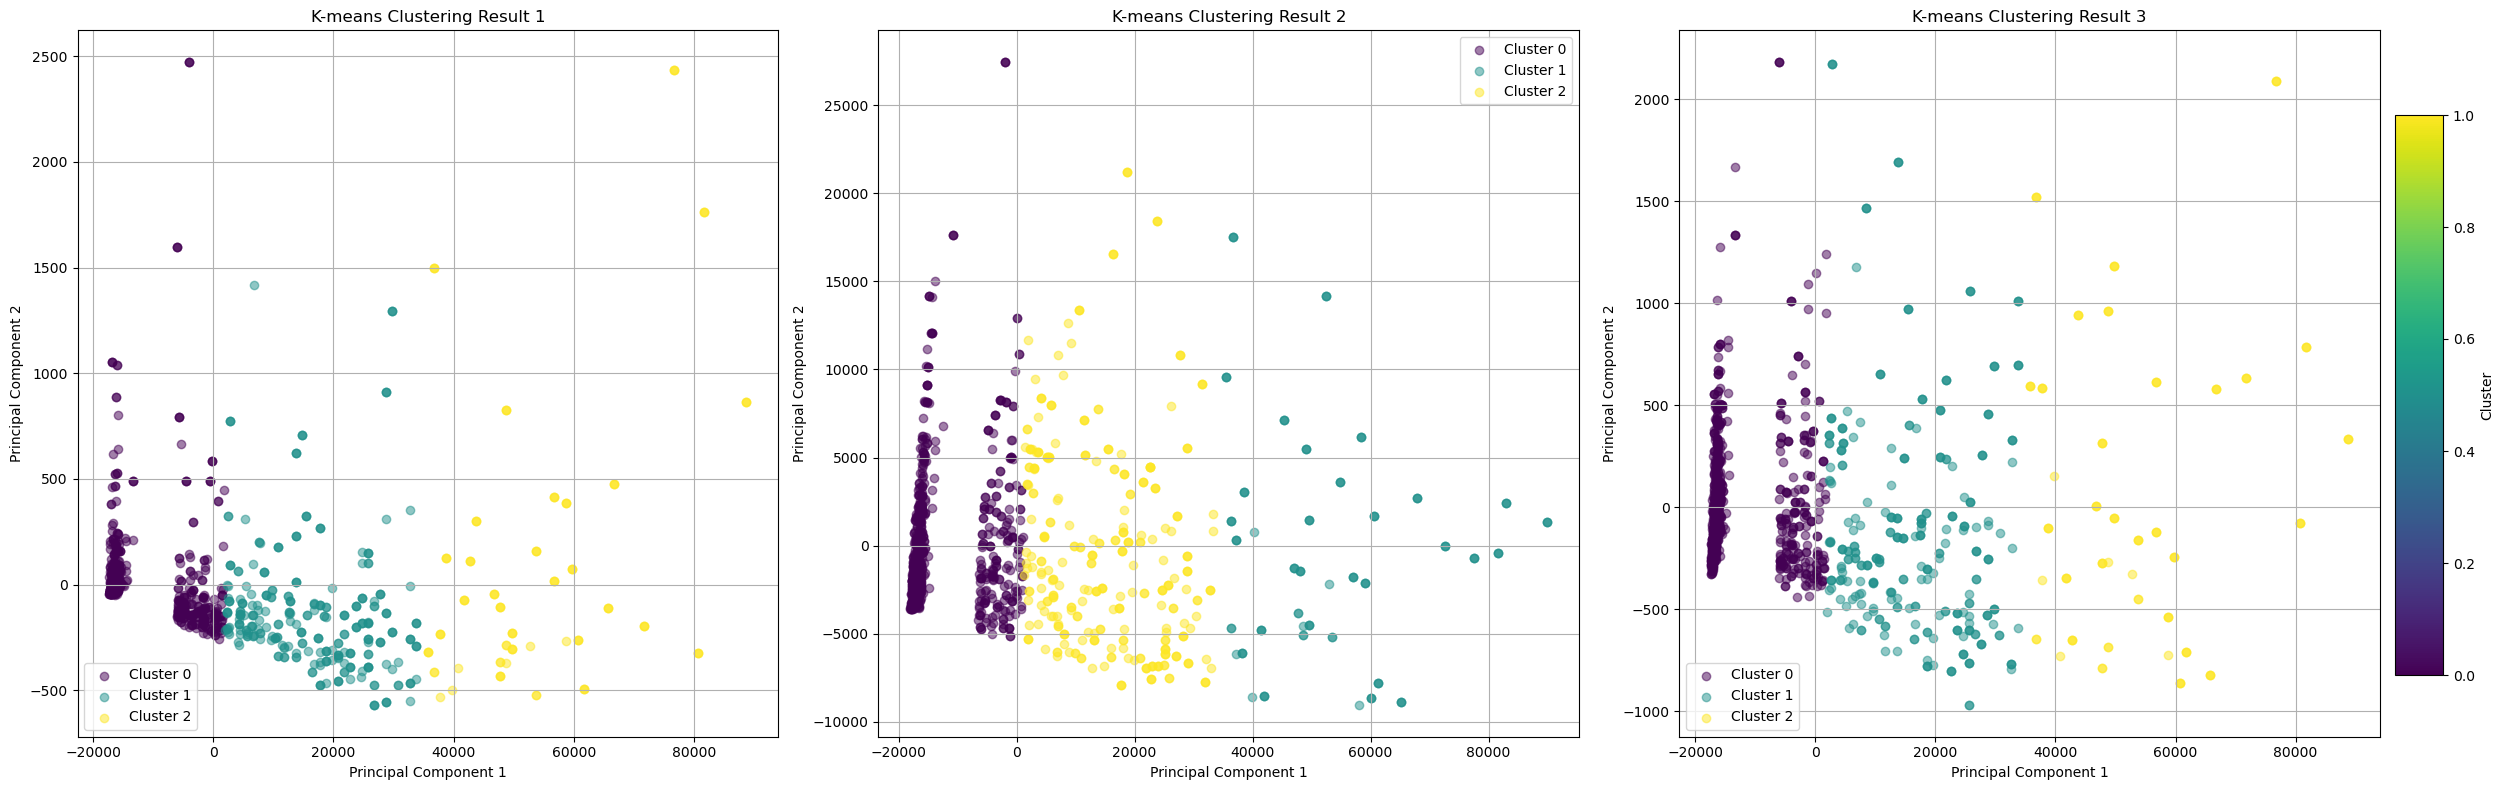

In [48]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(24,8))

# Define unique colors for each cluster
unique_labels = np.unique(cluster3_1)  # Assuming 'cluster1' has the same labels as the other clusters
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Loop through each clustering result and visualize it in a separate subplot
for i, (features, cluster_labels) in enumerate(zip([features, features2, features3], [cluster3_1, cluster5_2, cluster4_3])):
    # Perform PCA to reduce the dimensionality
    pca = PCA(n_components=2)
    features_reduced = pca.fit_transform(features)
    
    # Plot data points with cluster assignments
    for label, color in zip(unique_labels, colors):
        indices = cluster_labels == label
        axes[i].scatter(features_reduced[indices, 0], features_reduced[indices, 1], c=color, cmap='viridis', alpha=0.5, label=f'Cluster {label}')
    
    # Add labels and title
    axes[i].set_xlabel('Principal Component 1')
    axes[i].set_ylabel('Principal Component 2')
    axes[i].set_title(f'K-means Clustering Result {i+1}')
    axes[i].grid(True)
    axes[i].legend()  # Add legend

# Add color bar legend to the last subplot
plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), cax=cbar_ax, label='Cluster')

plt.tight_layout()
plt.show()

After evaluating the silhouette scores for all three KMeans clustering results, I noticed that the clusters with 3 and 4 variables were around the same value. This suggests that the clustering quality across these 2 different sets of features is comparable. However, since the clustering with all 4 variables provides the most comprehensive representation of the data, capturing various aspects such as rating, user interest, review count, and player engagement, I have decided to proceed with this clustering result.

Additionally, I will experiment with different values of Hyperparameter Tuning and trying different clustering algos to determine if it influences the clustering quality and potentially leads to an improvement in the silhouette score. This approach aims to ensure robustness and consistency in the clustering analysis."

#HYPERPARAMETER TUNING

In [49]:
# Use K-means clustering to identify groups of similar games based on the selected features
#kmeans = KMeans(n_clusters=3, random_state=100,n_init=10, init='k-means++', max_iter=300)
kmeans = KMeans(n_clusters=3, random_state=10000)
kmeans.fit(features3)
clusters = kmeans.predict(features3)

In [50]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features3, clusters)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6706214363777218


Despite trying out all sorts of hyperparametr tuning, cluster model did not improve

#TRYING DIFFERENT CLUSTERING ALGOS

In [51]:
# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_H1 = hierarchical.fit_predict(features3)

In [52]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features3, cluster_H1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6541119331393771


In [53]:
# Instantiate DBSCAN with appropriate parameters
dbscan = DBSCAN(eps=0.5, min_samples=3) 

cluster_DBSCAN1=dbscan.fit_predict(features3)

In [54]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features3, cluster_DBSCAN1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.4937031469801465


A negative silhouette score indicates that the clustering results are worse than random assignment of points to clusters. DBSCAN is most likely not well suited for this data set with only around 1000 datas.

In [55]:
gmm = GaussianMixture(n_components=3, random_state=42)
cluster_GM1 = gmm.fit_predict(features2)

In [56]:
# Calculate silhouette score
silhouette_avg = silhouette_score(features2, cluster_GM1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.36446932719788705


The silhoutte score for Gaussian Mixture Models (GMM) of 0.488 is much lower than kmeans of 0.67. This is due to the data not following a Gaussian distribution and the variables used for clustering are not normalized, GMM may not be the most appropriate choice for clustering. GMM assumes that the data is generated from a mixture of Gaussian distributions, and its performance can be hindered when this assumption is violated.

In conclusion, while hierarchical algo gave a decent silhoutte score of 0.67, the kmeans with 4 varibles and without hyerparameter (increasing random seed might cause inconsistency problems later on if code is restarted and ran over again) is the still the best clustering model and will be used for logistics regression. 

K-means produces non-overlapping clusters, which can be easier to interpret than the hierarchical structure produced by hierarchical clustering. Each data point is assigned to one and only one cluster in K-means, whereas in hierarchical clustering, data points can belong to multiple clusters at different levels of the hierarchy. 

Kmeans cluster algo makes it easier to understand and interpret the grouping of data points.

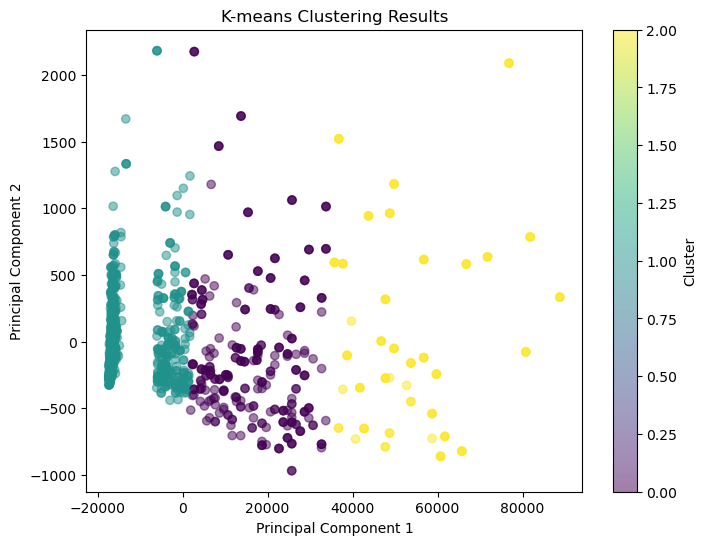

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce the dimensionality
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features3)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot data points with cluster assignments
plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=clusters, cmap='viridis', alpha=0.5)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results')

# Add color bar legend
plt.colorbar(label='Cluster')

plt.show()


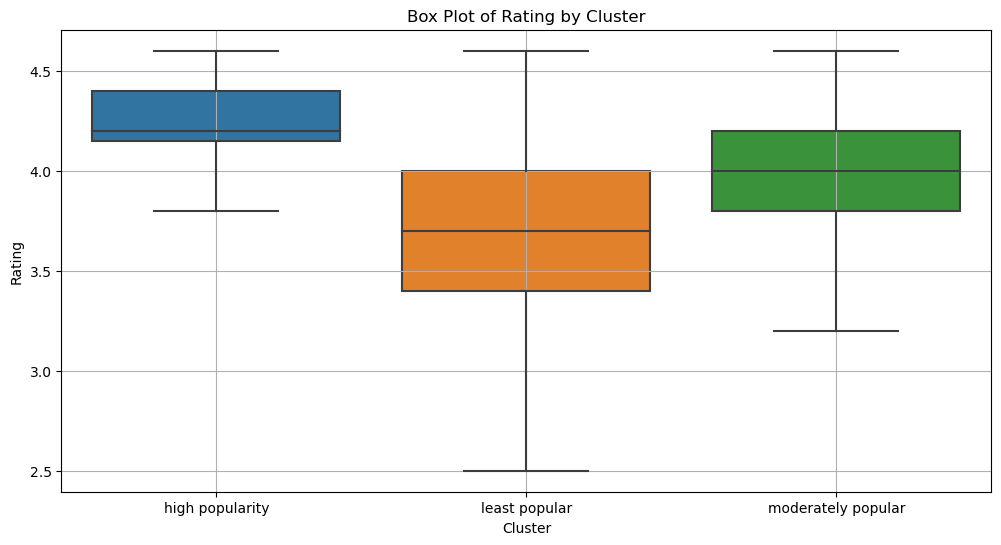

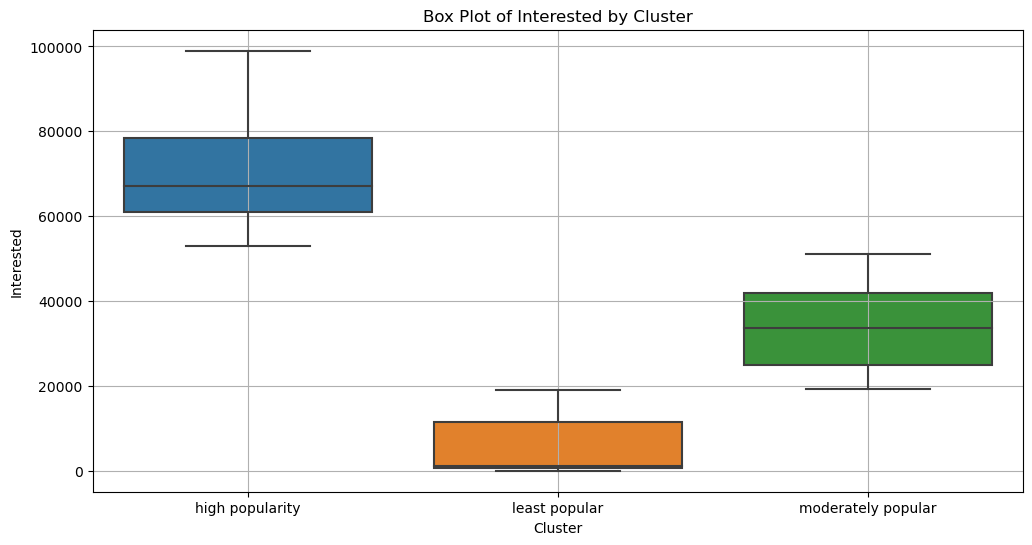

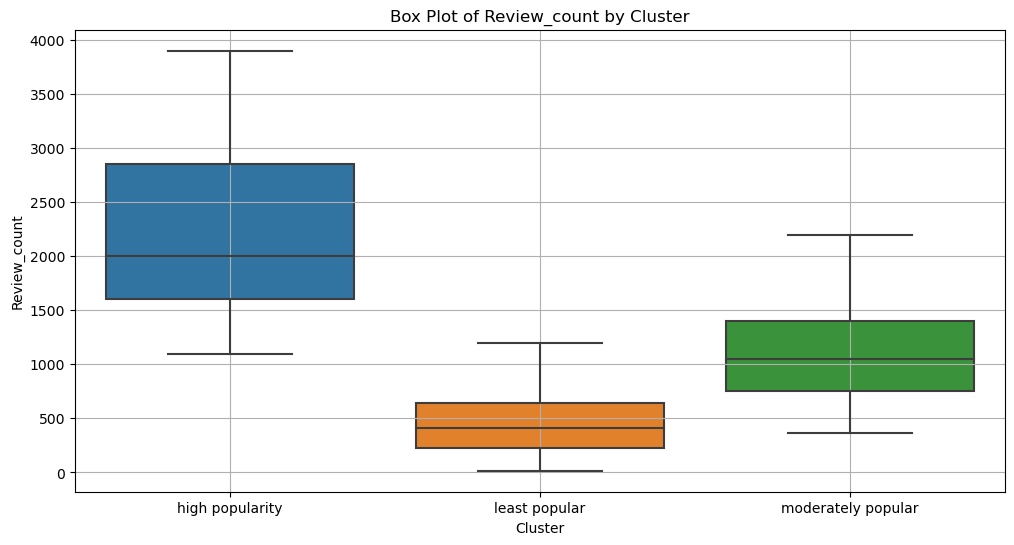

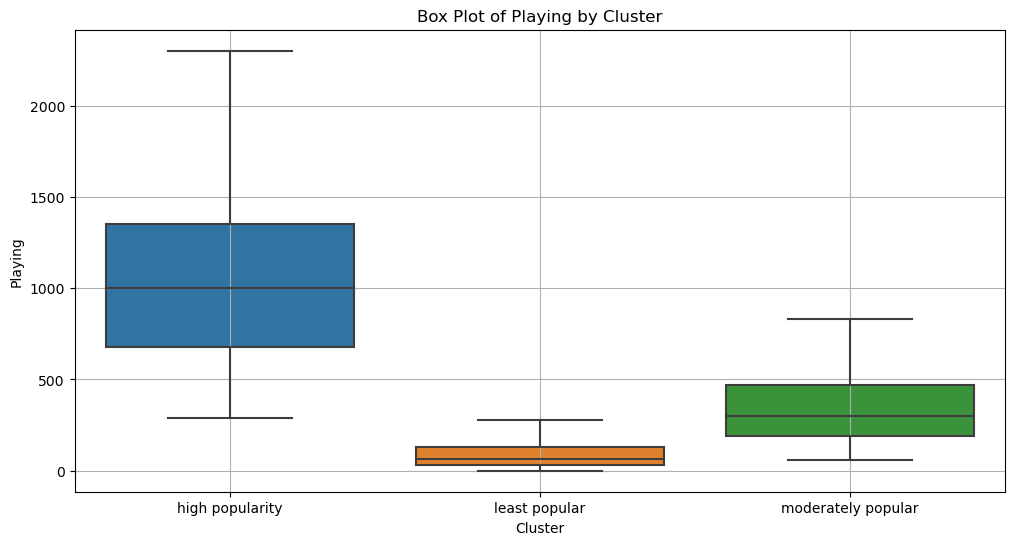

In [58]:
positive_games['clusters']=clusters
# Create box plots for each feature, grouped by cluster
cluster_labels = {1: 'least popular', 0: 'moderately popular', 2: 'high popularity'}

for feature in features3:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=positive_games['clusters'].map(cluster_labels), y=feature, data=positive_games,showfliers=False)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

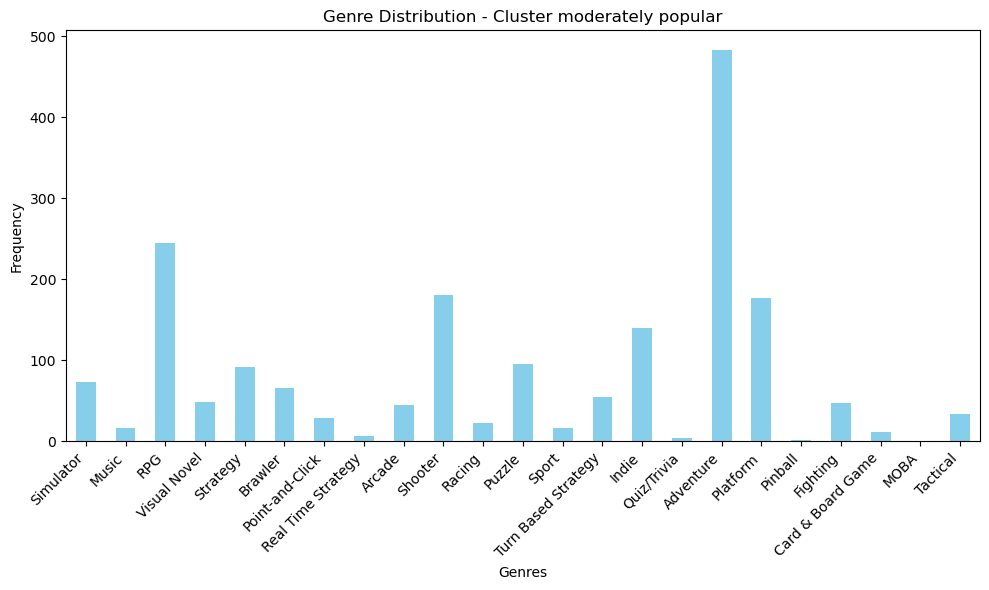

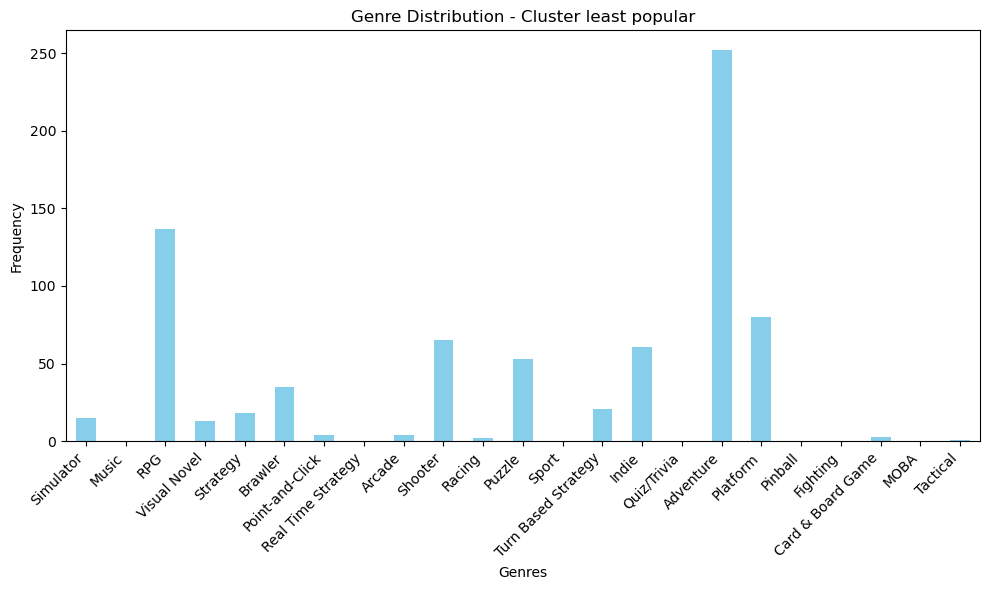

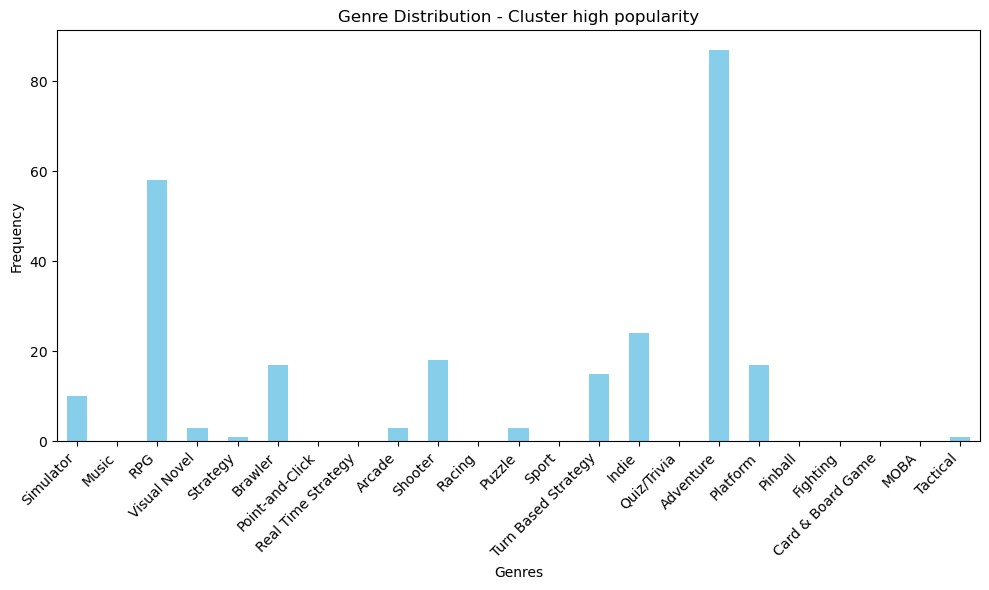

In [101]:
grouped_data = positive_games.groupby('cluster4_3')

# Plot bar charts for each cluster
for cluster, group in grouped_data:
    # Calculate genre frequencies within the cluster
    cluster_genre_frequencies = group[genre_columns].sum()
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    cluster_genre_frequencies.plot(kind='bar', color='skyblue')
    
    # Customize plot labels and title
    plt.title(f'Genre Distribution - Cluster {cluster_labels[cluster]}')
    plt.xlabel('Genres')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap of labels
    plt.show()

In [102]:
# Define a function to get the top n genres for each cluster
def top_n_genres(group, n=5):
    # Calculate genre frequencies within the cluster
    cluster_genre_frequencies = group[genre_columns].sum()
    # Sort genres by frequency in descending order
    sorted_genres = cluster_genre_frequencies.sort_values(ascending=False)
    # Get top n genres
    top_n = sorted_genres.head(n)
    return top_n


In [103]:
cluster_counts = positive_games['clusters'].value_counts()

print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
1    791
0    296
2     95
Name: clusters, dtype: int64


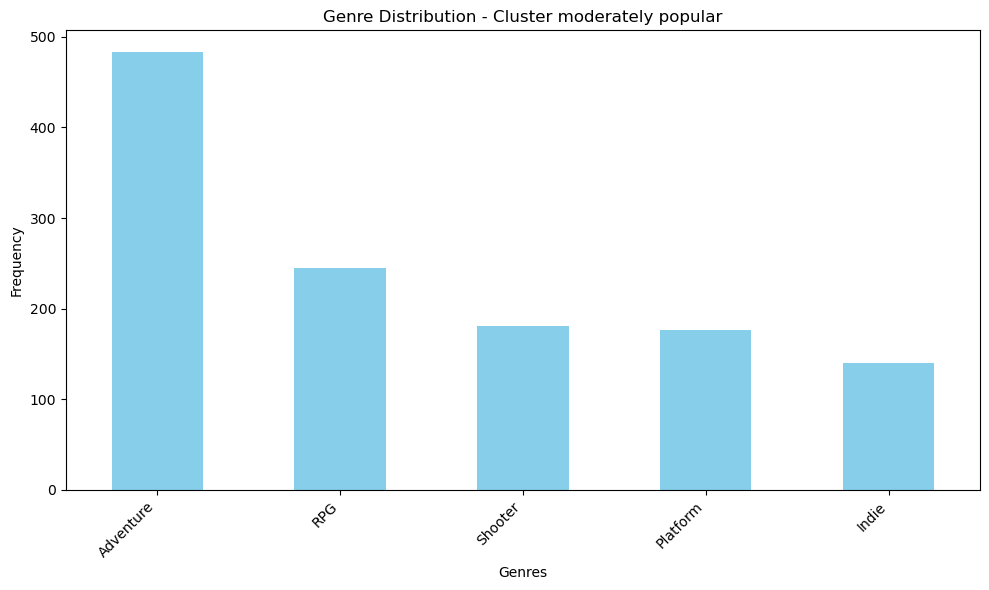

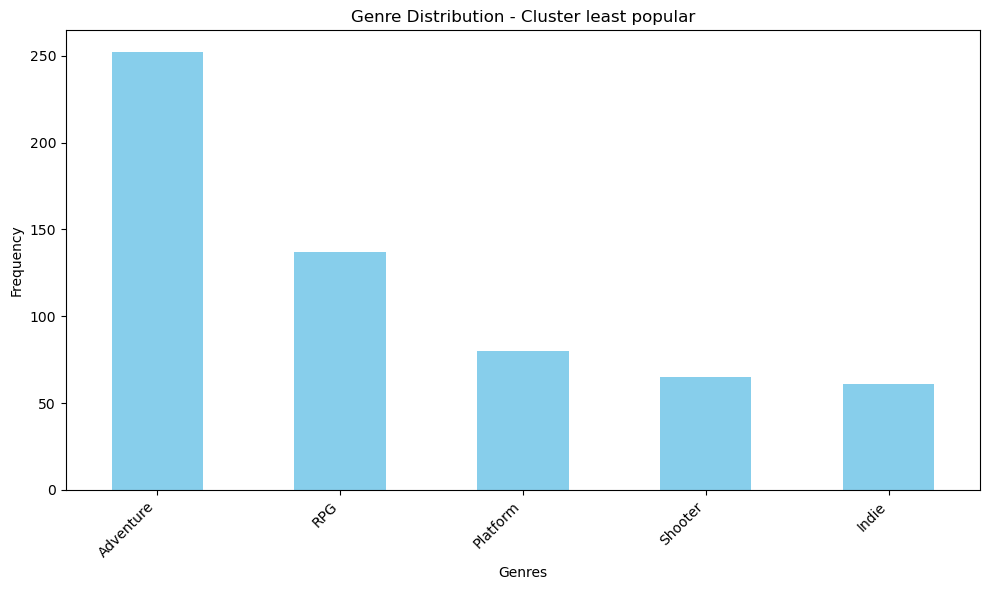

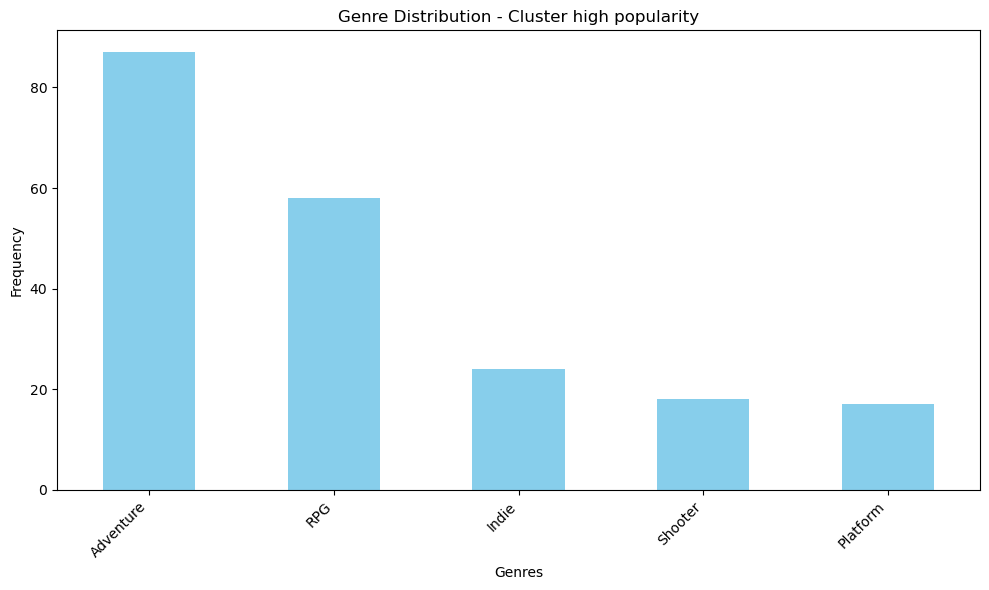

In [105]:
# Plot bar charts for each cluster
for cluster, group in grouped_data:
    # Get top 3 genres for the cluster
    top_genres = top_n_genres(group)
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    top_genres.plot(kind='bar', color='skyblue')
    
    # Customize plot labels and title
    plt.title(f'Genre Distribution - Cluster {cluster_labels[cluster]}')
    plt.xlabel('Genres')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap of labels
    plt.show()

Across all cluster groups, Adventure and RPG genres consistently emerge as the top two genres, underscoring their universal popularity and enduring appeal among players. With constant high ratings over the years as well from EDA, their consistent high frequency indicates a strong preference for immersive storytelling, exploration, and role-playing experiences across diverse player demographics.

These 2 genres can provide a solid foundation for innovation and creativity within the gaming industry. Developers can build upon the established principles and elements of these genres to create new and innovative gaming experiences with other genres.

The varying frequency of Indie, Platform and Shooter genres across clusters, despite not having a lot of games with this genres, suggests differences in player engagement levels or preferences in these genres. These games can have different, artstyles, achievements goals, stories and more. The varying frequency might mean that only certain games belonging to these genres have appealed to players, especially as seen in EDA, where the ratings of these genres are either high or low over the years. (inconsistent)

Conduct of deeper analysis, possibly through surveys, focus groups, or player interviews, to understand the specific features, themes, and aspects of Indie and Shooter games that appeal to players could be done to find out what time would make the game most likely popular with this genre.

According to exploratory data analysis (EDA), the Brawler genre has been becoming increasingly but slowly popular with constant good ratings since 2006. Despite not being among the top genres in overall popularity, the steady rise in interest and sustained positive ratings suggest a growing niche audience or a resurgence of interest in brawler-style games over time. This fact is further backed up by the fact that the Brawler genre can only be seen as the top 5 genres in the moderate popularity cluster and not in low popularity genre.

Game developers and publishers can leverage this insight to capitalize on the growing popularity of the Brawler genre by creating innovative and engaging titles that cater to the specific preferences of players interested in dynamic combat and multiplayer interactions characteristic of brawler games.

# MACHINE LEARNING MODELS

# Logistics Regression

Logistic Regression is a statistical model that uses a logistic function to model a binary dependent variable (target variable), which is the clusters made. It is predictive analysis and it classifies the outcome by calculating the probability of that event to occur.

This model is suitable for our problem and dataset to be able to handle high-dimensional feature spaces like TF-IDF matrices.

Using logistic regression with TF-IDF matrix of summaries as features and clusters (e.g., highly popular, moderately popular, low popularity) as the target variable can provide a few insghts

1. INTERPRETING: Logistic regression coefficients can provide insights into the importance of different words or terms in determining the likelihood of a game belonging to a certain popularity cluster. This helps identify key factors contributing to the popularity of games based on their summaries.

2. PREDICTING: It can also effectively classify new games into popularity clusters based on their summary texts. By learning the relationship between the features (keywords in summaries) and the target variable (popularity clusters), the model can make accurate predictions about the popularity level of unseen games.

3. FEATURE IMPORTANCE: Logistic regression coefficients would indicate the importance of different words or terms in determining the popularity clusters of games. Positive coefficients for certain words or terms would suggest that their presence increases the likelihood of a game being classified into a particular popularity cluster, while negative coefficients would indicate the opposite effect.



# MODEL 2 with HYPERPARAMETER TUNING

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix_filtered,
    positive_games['cluster4_3'],
    test_size=0.2,
    random_state=42,
    stratify=positive_games['cluster4_3']  # Ensure proportional class distribution
)

# Calculate class frequencies
class_freq = {
    0: 791,  # Moderately popular
    1: 299,  # Low popularity
    2: 95    # High popularity
}

# Calculate class weights (inversely proportional to class frequencies)
total_samples = sum(class_freq.values())
class_weights = {cls: total_samples / (len(class_freq) * freq) for cls, freq in class_freq.items()}

# Train a Logistic Regression model with class weights
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight=class_weights)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted precision for imbalanced data (optional)
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted recall for imbalanced data (optional)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8818565400843882
Precision: 0.8797648116245973
Recall: 0.8818565400843882


# ANALYSIS OF MODEL

Accuracy: This metric represents the overall correctness of the model's predictions. In your case, the accuracy of 0.881 indicates that the model correctly predicted the popularity category (high, moderate, or low) for approximately 88.1% of the games in the test dataset.

Precision: Precision measures the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives). A precision score of 0.879 indicates that when the model predicts a game to be in a specific popularity category, it is correct about 87.9% of the time on average across all categories.

Recall: Recall, also known as sensitivity, measures the proportion of correctly predicted positive instances out of all actual positive instances (true positives + false negatives). A recall score of 0.881 indicates that the model identified approximately 88.1% of all actual positive instances across all popularity categories.

Model 2 shows a more promising performance in accurately predicting the popularity categories of video games based on their summary text. The high accuracy, precision, and recall scores suggest that the model is effective in distinguishing between high, moderate, and low popularity games.

In [83]:
from sklearn.metrics import classification_report
# Define class labels
class_labels = ['Low Popularity', 'Medium Popularity', 'High Popularity']
# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=class_labels)

# Print class-wise metrics
print("Class-wise Metrics:")
print(class_report)

# F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. 
# It takes into account both false positives and false negatives.
# Support: Support refers to the number of instances in each popularity category.

Class-wise Metrics:
                   precision    recall  f1-score   support

   Low Popularity       0.89      0.94      0.91       159
Medium Popularity       0.82      0.69      0.75        59
  High Popularity       1.00      0.95      0.97        19

         accuracy                           0.88       237
        macro avg       0.90      0.86      0.88       237
     weighted avg       0.88      0.88      0.88       237



Precision, Recall, and F1-score for each cluster group: Model 2 generally performs better across all classes compared to Model 1. In Model 2, for example, the precision, recall, and F1-score for "Low Popularity" and "High Popularity" categories are higher compared to Model 1. This indicates that Model 2 has a better ability to correctly identify instances of these classes.
Model 2's recall and f1 score is also equally high for all clusters compared to model 1 that had some low scores like the recall of low popularity =16

Weighted Avg is the weighted average of precision, recall, and F1-score, weighted by the number of instances in each category. It provides a better understanding of the overall performance, especially in imbalanced datasets.
A score of 0.88 for all metrics indicates that model 2's predictions are accurate and reliable for the dataset as a whole, taking into account the distribution of instances across different popularity categories.

Therefore, Model 2 is preferred for its improved performance in predicting the popularity categories of video games thanks to hyperparameter tuning to help with the class imbalace

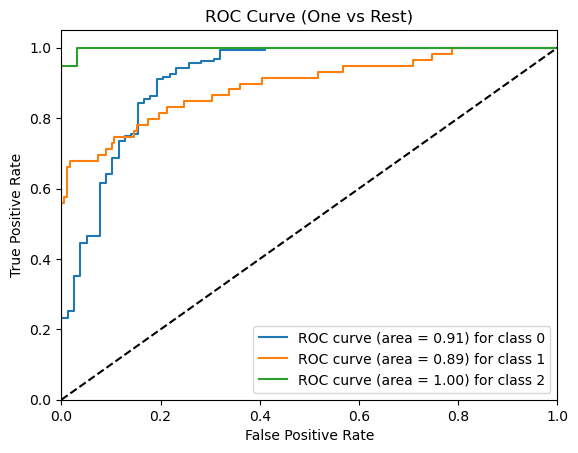

In [84]:
# 2. ROC Curve (One vs Rest)
from sklearn.metrics import roc_curve, auc

def plot_roc_curve_one_vs_rest(y_true, y_pred_proba, classes):
    n_classes = len(classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_true == classes[i]).astype(int), y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], classes[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (One vs Rest)')
    plt.legend(loc="lower right")
    plt.show()

# Assuming y_pred_proba contains the predicted probabilities and classes contains the class labels
plot_roc_curve_one_vs_rest(y_test, model.predict_proba(X_test), classes=[0, 1, 2])

1. How ROC will help to evalutate the logistics regression model

A Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a classification model, such as logistic regression, at various thresholds. It plots the true positive rate (TPR) against the false positive rate (FPR) at different threshold settings.

The ROC curve provides a comprehensive overview of the trade-off between sensitivity (true positive rate) and specificity (true negative rate). It allows you to assess the model's ability to correctly classify true positives while minimizing false positives.

2. Evaluation of model:

Area under curve (AUC) of 0.1 for the "high popularity" class suggests that the model has an excellent ability to distinguish between instances of high popularity and instances of other classes. It indicates that the model can effectively separate high popularity games from non-high popularity games. this goes the same for the other 2 groups with also high AUC scores.

So, with high AUC scores across all three popularity classes, the model demonstrates strong discriminatory power in distinguishing between instances of different popularity levels. This indicates that the model's predictions are reliable and effective in classifying games into their respective popularity categories. Therefore, it can be concluded that the model performs well in identifying high, medium, and low popularity games, making it suitabe to find and predict what trends in genre or other variables that will make the game popular.

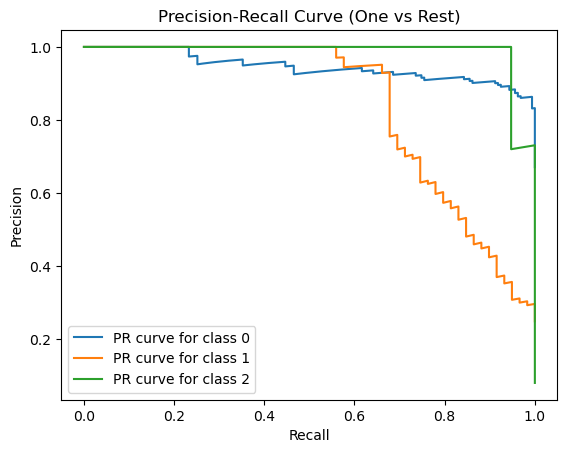

In [85]:
# 3. Precision-Recall Curve (One vs Rest)
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve_one_vs_rest(y_true, y_pred_proba, classes):
    n_classes = len(classes)
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve((y_true == classes[i]).astype(int), y_pred_proba[:, i])
        plt.plot(recall[i], precision[i], label='PR curve for class %s' % (classes[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (One vs Rest)')
    plt.legend(loc="lower left")
    plt.show()
    
# Assuming y_pred_proba contains the predicted probabilities and classes contains the class labels
plot_precision_recall_curve_one_vs_rest(y_test, model.predict_proba(X_test), classes=[0, 1, 2])

A precision-recall curve showing high precision at low recall and low precision at high recall indicates that the model is capable of making trade-offs between precision and recall based on the specific requirements of the application.

This means that model 2 has a good capabilty to adapt its prediction based on specific needs. For example, If we need high precision to accurately identify potential high-popularity games or high recal for capturing all high-popularity games, even at the expense of including some false positives

# LOGISTICS REGRESSION FEATURE IMPORTANCE: COEFFIENT

In [86]:
# Get the coefficients (weights) of each feature
coefficients = model.coef_

# Create a DataFrame to store feature names and their corresponding coefficients
coeff_df = pd.DataFrame({'Feature': feature_names_filtered, 'Coefficient': coefficients[0]})

# Separate positive and negative coefficients
positive_coeffs = coeff_df[coeff_df['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False)
negative_coeffs = coeff_df[coeff_df['Coefficient'] < 0].sort_values(by='Coefficient', ascending=True)

# Print the top N positive features with their coefficients
top_n = 10
print(f"Top {top_n} positive features by importance:")
print(positive_coeffs.head(top_n)[['Feature', 'Coefficient']])

# Print the top N negative features with their coefficients
print(f"\nTop {top_n} negative features by importance:")
print(negative_coeffs.head(top_n)[['Feature', 'Coefficient']])

Top 10 positive features by importance:
       Feature  Coefficient
5013    pokmon     0.990648
4980    player     0.852458
3296   include     0.744198
2107    emblem     0.694792
6001   shooter     0.584683
2795      good     0.562492
4513  nintendo     0.517787
2758      girl     0.510613
4128      mega     0.507901
962       bros     0.504556

Top 10 negative features by importance:
      Feature  Coefficient
4826     past    -1.235396
5699      rpg    -0.934618
3201     hunt    -0.877413
7460   yakuza    -0.861868
2088  element    -0.858970
7480    young    -0.827001
2078    elden    -0.811278
1741    demon    -0.762756
6212     soul    -0.759565
2458    fight    -0.745474


In [87]:
# Create a DataFrame to store coefficients
coefficients_df = pd.DataFrame(coefficients, columns=feature_names_filtered, index=model.classes_)

# Create empty DataFrames to store top 10 positive and negative coefficients
top_positive_coeffs_df = pd.DataFrame(index=[f'Top {i+1}' for i in range(10)])
top_negative_coeffs_df = pd.DataFrame(index=[f'Top {i+1}' for i in range(10)])

# Iterate over each cluster group to extract top 10 positive and negative coefficients
for cluster in coefficients_df.index:
    # Get top 10 positive coefficients for the current cluster
    top_positive_coeffs = coefficients_df.loc[cluster].nlargest(10)
    top_positive_coeffs_df[cluster] = top_positive_coeffs.values
    
    # Get top 10 negative coefficients for the current cluster
    top_negative_coeffs = coefficients_df.loc[cluster].nsmallest(10)
    top_negative_coeffs_df[cluster] = top_negative_coeffs.values

# Print the DataFrames
print("Top 10 Positive Coefficients:")
print(top_positive_coeffs_df)

print("\nTop 10 Negative Coefficients:")
print(top_negative_coeffs_df)



Top 10 Positive Coefficients:
               0         1         2
Top 1   0.990648  0.974287  1.586019
Top 2   0.852458  0.806452  1.423870
Top 3   0.744198  0.794993  1.306561
Top 4   0.694792  0.750381  1.228795
Top 5   0.584683  0.684454  1.055724
Top 6   0.562492  0.645955  1.043390
Top 7   0.517787  0.634652  1.025754
Top 8   0.510613  0.628187  1.013249
Top 9   0.507901  0.625100  0.997478
Top 10  0.504556  0.618286  0.994817

Top 10 Negative Coefficients:
               0         1         2
Top 1  -1.235396 -0.830598 -0.747436
Top 2  -0.934618 -0.774740 -0.623747
Top 3  -0.877413 -0.773131 -0.584503
Top 4  -0.861868 -0.707725 -0.580693
Top 5  -0.858970 -0.683477 -0.563202
Top 6  -0.827001 -0.608853 -0.533377
Top 7  -0.811278 -0.598141 -0.524425
Top 8  -0.762756 -0.576563 -0.514696
Top 9  -0.759565 -0.565567 -0.487117
Top 10 -0.745474 -0.563424 -0.471879


In [88]:
coefficients_df.head()

,1,11,111,12,124,128,12player,12thcentury,13,135,...,zerog,zeroranger,zestiria,zeus,zombie,zombielike,zombiezapping,zone,zoom,zx
0,0.282444,0.039757,-0.168784,0.065721,0.059039,0.014708,0.044111,0.125952,0.110987,0.022145,...,0.083497,0.0,0.045789,0.065886,0.228410,0.031162,0.043412,-0.016137,0.038043,0.033701
1,-0.121718,-0.029416,0.247815,-0.045546,-0.040272,-0.007809,-0.030308,-0.092138,-0.079212,-0.014642,...,-0.050965,0.0,-0.028969,-0.041833,-0.149224,-0.017103,-0.028020,0.105576,-0.022177,-0.020370
2,-0.160726,-0.010341,-0.079030,-0.020175,-0.018767,-0.006899,-0.013803,-0.033814,-0.031775,-0.007503,...,-0.032531,0.0,-0.016820,-0.024054,-0.079186,-0.014059,-0.015392,-0.089440,-0.015866,-0.013332


In [89]:
coefficients_df_transposed = coefficients_df.T.reset_index()
coefficients_df_transposed = coefficients_df_transposed.rename(columns={'index': 'feature'})
coefficients_df_transposed = coefficients_df_transposed.rename(columns={ 0: 'Medium_popularity'})
coefficients_df_transposed = coefficients_df_transposed.rename(columns={ 1: 'Low_popularity'})
coefficients_df_transposed = coefficients_df_transposed.rename(columns={ 2: 'High_popularity'})
coefficients_df_transposed.head()

,feature,Medium_popularity,Low_popularity,High_popularity
0,1,0.282444,-0.121718,-0.160726
1,11,0.039757,-0.029416,-0.010341
2,111,-0.168784,0.247815,-0.079030
3,12,0.065721,-0.045546,-0.020175
4,124,0.059039,-0.040272,-0.018767


In [90]:
coefficients_df_transposed.shape

(7511, 4)

In [91]:
coefficients_df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7511 entries, 0 to 7510
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   feature            7511 non-null   object 
 1   Medium_popularity  7511 non-null   float64
 2   Low_popularity     7511 non-null   float64
 3   High_popularity    7511 non-null   float64
dtypes: float64(3), object(1)
memory usage: 234.8+ KB


In [92]:
# Get the top 10 coefficients for each column
top_10_medium_popularity = coefficients_df_transposed.nlargest(10, 'Medium_popularity')
top_10_low_popularity = coefficients_df_transposed.nlargest(10, 'Low_popularity')
top_10_high_popularity = coefficients_df_transposed.nlargest(10, 'High_popularity')


top_10_medium_popularity.pop("Low_popularity")
top_10_medium_popularity.pop("High_popularity")
top_10_low_popularity.pop("Medium_popularity")
top_10_low_popularity.pop("High_popularity")
top_10_high_popularity.pop("Low_popularity")
top_10_high_popularity.pop("Medium_popularity")

# Print the top 10 coefficients for each column

print("\nTop 10 positive Coefficients for Low Popularity:")
print(top_10_low_popularity)

print("Top 10 postive Coefficients for Medium Popularity:")
print(top_10_medium_popularity)

print("\nTop 10 positve Coefficients for High Popularity:")
print(top_10_high_popularity)


Top 10 positive Coefficients for Low Popularity:
         feature  Low_popularity
7460      yakuza        0.974287
3868          ll        0.806452
4826        past        0.794993
2296  experience        0.750381
5041      portal        0.684454
2822       grand        0.645955
7363    wildlife        0.634652
3818        life        0.628187
7234      visual        0.625100
7334        west        0.618286
Top 10 postive Coefficients for Medium Popularity:
       feature  Medium_popularity
5013    pokmon           0.990648
4980    player           0.852458
3296   include           0.744198
2107    emblem           0.694792
6001   shooter           0.584683
2795      good           0.562492
4513  nintendo           0.517787
2758      girl           0.510613
4128      mega           0.507901
962       bros           0.504556

Top 10 positve Coefficients for High Popularity:
                  feature  High_popularity
2078                elden         1.586019
1538  criticallyacclaimed 

Positive coefficients in logistic regression represent the features that are positively associated with the respective cluster group (game popularity). They indicate that an increase in the value of the feature is associated with an increase in the likelihood of the game being classified as highly popular in the high-popularity cluster and so on. We focus on positive coefficients because they provide insights into the keywords(which might show whatcontent the players look forward to) that contribute to higher popularity ratings for games.

Low Popularity:
The top features associated with low popularity include "portal," "health," "life," and "yakuza." These coefficients suggest that games featuring these elements are more likely to have lower popularity ratings. 

Medium Popularity:
Features like "player," "pokémon," "emblem," and "battle" have the highest positive coefficients for games with medium popularity. This indicates that games with elements related to these features are more likely to fall into the medium popularity category.

High Popularity:
The top positive coefficients for high popularity include features like "elden," "cuphead," "overrun," and "critically acclaimed." These coefficients suggest that games featuring these elements are more likely to be classified as highly popular among players.

While these coefficients provide insights into the keywords associated with different levels of popularity, understanding how these keywords contribute to a game's overall popularity requires examining their connection to specific genres. By identifying the genres associated with the top 10 features, we can gain a deeper understanding of the types of games that tend to be more popular among players. This additional analysis will provide valuable insights into the underlying factors driving game popularity and inform future game development and marketing strategies.

In [106]:
keywords = ['elden', 'cuphead', 'shin', 'criticallyacclaimed', 'overrun', 'resident', 'enhanced', 'psychic', 'ni', 'semester']

# Create a filter condition using str.contains() and the specified keywords
popular_Genre = positive_games[positive_games['Summary'].str.contains('|'.join(keywords), case=False)]

# IDENTIFYING GENRES ASSOCIATES TO TOP 10 FEATURES

In [107]:
popular_Genre

,Title,Genres,Summary,Reviews,Rating,Playing,Year,Interested,Total Plays,Review_count,...,Fighting,Card & Board Game,MOBA,Tactical,LanguageDetection,Sentiment,cluster3_1,cluster5_2,cluster4_3,clusters
0,Elden Ring,"['Adventure', 'RPG']",Elden Ring is a fantasy action and open world ...,The first playthrough of elden ring is one of ...,4.5,3800.0,2022,94000.0,17000.0,3900.0,...,0,0,0,0,"(en, 0.9999974439278215)",0.217273,2,1,2,2
2,Undertale,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A small child falls into the Underground where...,soundtrack is tied for 1 with nier automata a...,4.2,679.0,2015,67000.0,28000.0,3500.0,...,0,0,0,0,"(en, 0.9999977343636977)",0.181019,2,1,2,2
3,Hollow Knight,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,this games worldbuilding is incredible with it...,4.4,2400.0,2017,106000.0,21000.0,3000.0,...,0,0,0,0,"(en, 0.9999971866450201)",0.108462,2,1,2,2
4,Minecraft,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it Unfortunately...,4.3,1800.0,2011,11230.0,33000.0,2300.0,...,0,0,0,0,"(en, 0.8571394849144741)",0.092857,0,0,0,1
6,Metroid Dread,"['Adventure', 'Platform']",Join intergalactic bounty hunter Samus Aran in...,Have only been a Metroid fan for couple of yea...,4.3,759.0,2021,67000.0,9200.0,2100.0,...,0,0,0,0,"(en, 0.9999960737978084)",0.066000,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,The Godfather,"['Adventure', 'Racing', 'Shooter']",The Godfather puts you into the action of the ...,juego para pibes cine 2 esta mierda es mejor q...,3.6,2.0,2006,332.0,1100.0,121.0,...,0,0,0,0,"(en, 0.9999951895509325)",0.133687,0,0,0,1
1405,Another World,"['Adventure', 'Platform', 'Puzzle']",Another World chronicles the story of a man hu...,this one raises the bar for both video games a...,3.3,8.0,1991,533.0,939.0,232.0,...,0,0,0,0,"(en, 0.9999960092197254)",0.069298,0,0,0,1
1406,Back to the Future: The Game,"['Adventure', 'Point-and-Click']",Back to the Future The Game is one of Telltale...,Very enjoyable game The story adds onto the mo...,3.2,5.0,2010,290.0,763.0,94.0,...,0,0,0,0,"(en, 0.9999969726054975)",0.123750,0,0,0,1
1408,Dragon's Dogma,"['Brawler', 'RPG']",Set in a huge open world Dragons Dogma Dark Ar...,Underrated A grandes rasgos es como un MMO per...,3.7,45.0,2012,693.0,1100.0,210.0,...,0,0,0,0,"(en, 0.9999957159728258)",0.041923,0,0,0,1


In [108]:
popular_Genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 1410
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                783 non-null    object 
 1   Genres               783 non-null    object 
 2   Summary              783 non-null    object 
 3   Reviews              783 non-null    object 
 4   Rating               783 non-null    float64
 5   Playing              783 non-null    float64
 6   Year                 783 non-null    int32  
 7   Interested           783 non-null    float64
 8   Total Plays          783 non-null    float64
 9   Review_count         783 non-null    float64
 10  Simulator            783 non-null    int64  
 11  Music                783 non-null    int64  
 12  RPG                  783 non-null    int64  
 13  Visual Novel         783 non-null    int64  
 14  Strategy             783 non-null    int64  
 15  Brawler              783 non-null    in

In [109]:
from scipy.stats import f_oneway

# Extracting numerical variables
numerical_vars = ['Rating', 'Interested', 'Playing', 'Review_count']

# Performing ANOVA for each numerical variable
for var in numerical_vars:
    # Extracting data for ANOVA
    genre_groups = []
    for genre in popular_Genre['Genres'].unique():
        genre_groups.append(popular_Genre[popular_Genre['Genres'] == genre][var])
    
    # Performing ANOVA
    f_statistic, p_value = f_oneway(*genre_groups)
    
    # Print results
    print(f"ANOVA for {var}:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("The differences in means are statistically significant.")
    else:
        print("The differences in means are not statistically significant.")
    print()


ANOVA for Rating:
F-statistic: 2.0241447119908473
P-value: 8.34984625622074e-10
The differences in means are statistically significant.

ANOVA for Interested:
F-statistic: 2.0188693309798045
P-value: 9.651407427534798e-10
The differences in means are statistically significant.

ANOVA for Playing:
F-statistic: 1.6198130759962
P-value: 2.513578474898313e-05
The differences in means are statistically significant.

ANOVA for Review_count:
F-statistic: 1.5747654807756681
P-value: 6.966051067970894e-05
The differences in means are statistically significant.



ANOVA, or Analysis of Variance, is a statistical method used to compare the means of three or more groups. It helps us understand if there are significant differences between the average values of different groups.

For our case, it will help us check if there is a variance of 'Rating', 'Interested', 'Playing', 'Review_count' across the different combinations of genres. If ANOVA indicates a significant difference of average values of these variables across the genres, it most likely indicated that there is a possible relationship between genre and the numerical variables.

In hypothesis testing, the significance level, often denoted by α (alpha), is typically set to 0.05. 

As can see from the p values, all the numerical variables might have a relationship with the genres combinations.

Hence, I will be using these variables to get the top 20 genre cobimations.

# Top 20 Genres according to the average of the numerical varibales used in model training

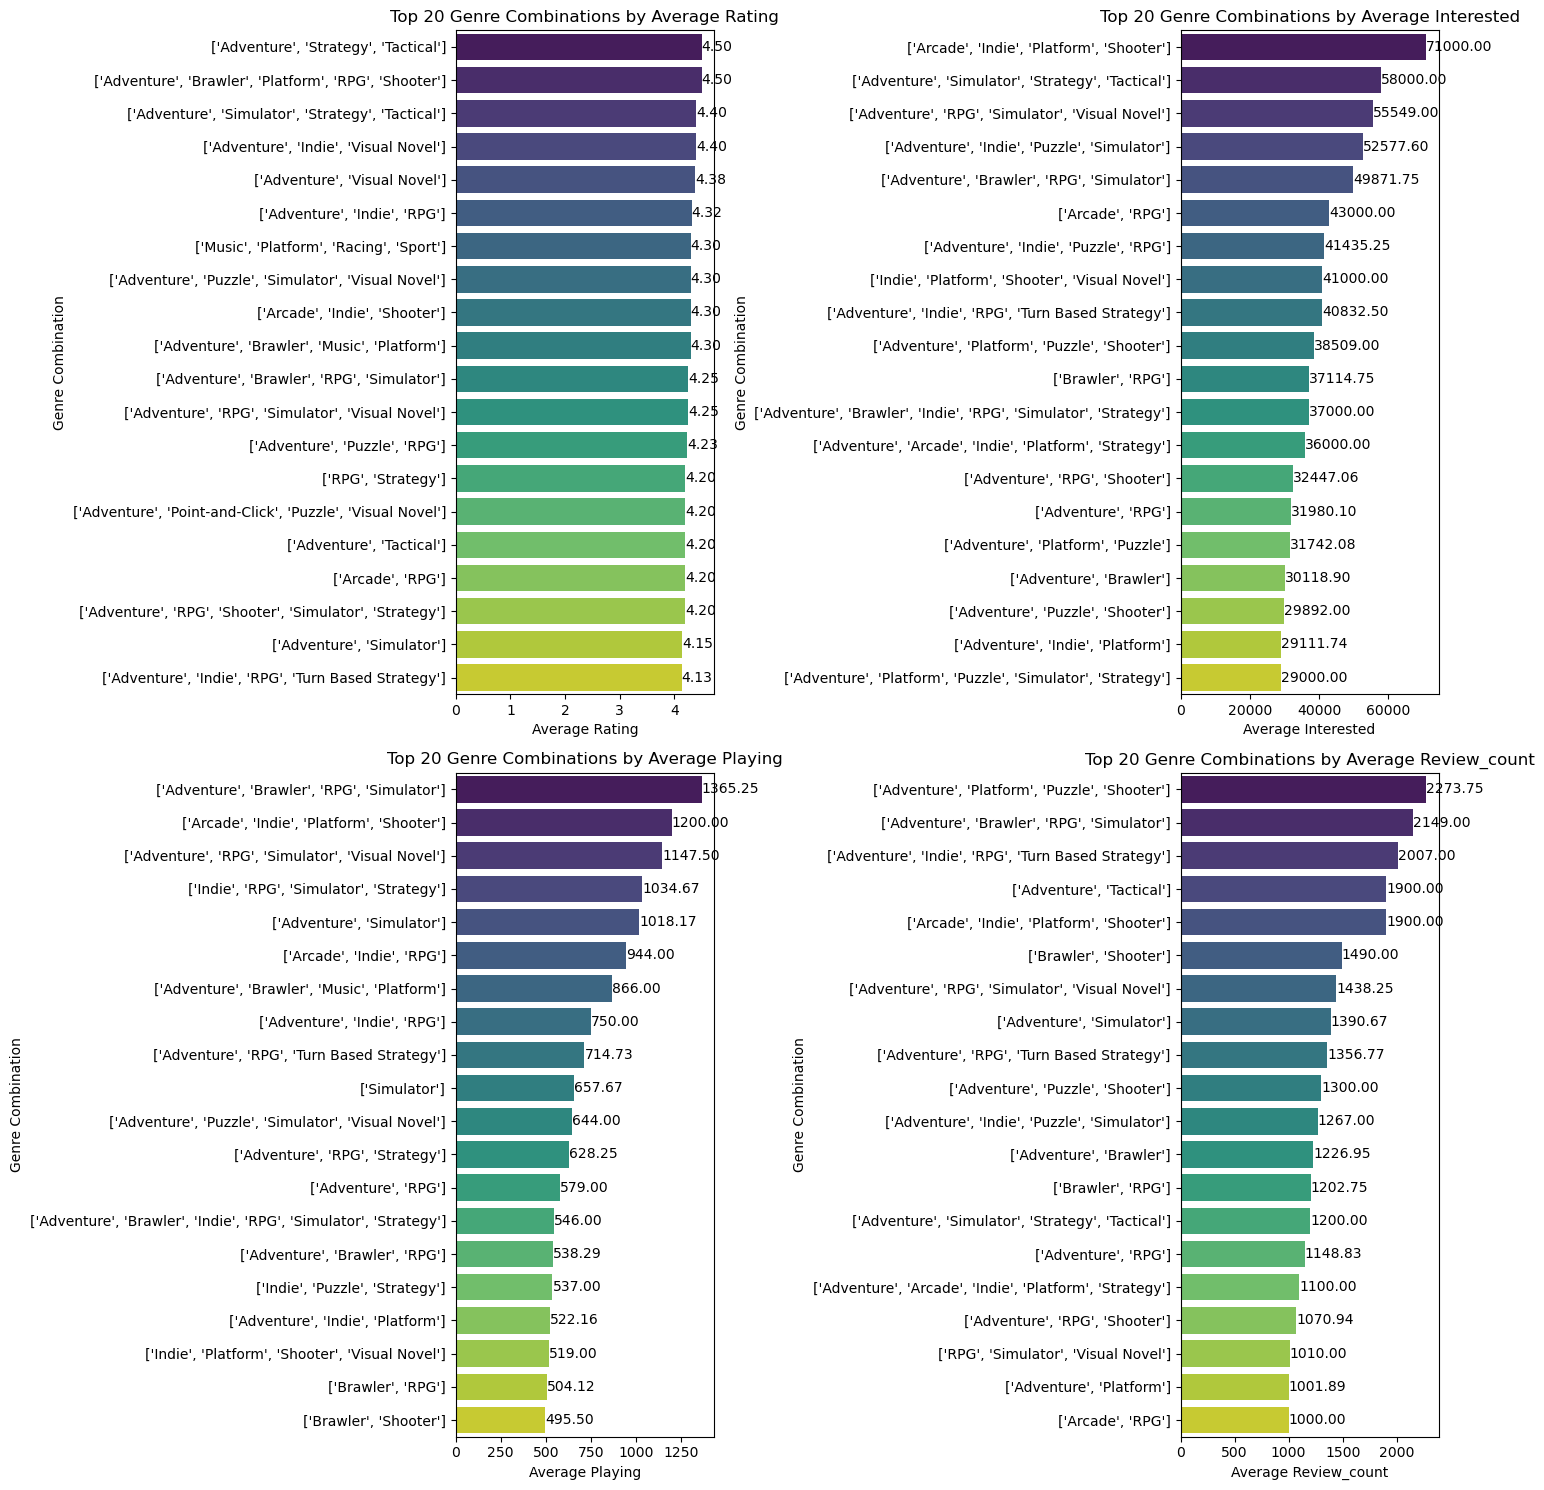

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical variables to include in the plot
numerical_variables = ['Rating', 'Interested', 'Playing', 'Review_count']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each numerical variable
for i, variable in enumerate(numerical_variables):
    # Group the data by genre combinations and calculate the average for the current variable
    genre_average = popular_Genre.groupby('Genres')[variable].mean().reset_index()
    
    # Sort the genre combinations based on their average value for the current variable
    top_20_genres = genre_average.sort_values(by=variable, ascending=False).head(20)
    
    # Plot the top 20 genre combinations for the current variable
    sns.barplot(x=variable, y='Genres', data=top_20_genres, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Top 20 Genre Combinations by Average {variable}')
    axes[i].set_xlabel(f'Average {variable}')
    axes[i].set_ylabel('Genre Combination')

    # Add average values on the bars
    for index, value in enumerate(top_20_genres[variable]):
        axes[i].text(value, index, f'{value:.2f}', ha='left', va='center', color='black')

# Hide the unused subplots
for j in range(len(numerical_variables), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



Interested:
Genres like adventure, brawler, indie, and RPG consistently stand out in the genre combinations, indicating strong player interest in these types of games. These genres offer rich storytelling, dynamic gameplay mechanics, and opportunities for exploration and progression, resonating well with players seeking interactive and captivating experiences. Identifying these combinations suggests they have the potential to attract and engage players actively seeking new gaming adventures. 

Review count:
The top genre combinations based on average review counts highlight genres that generate significant player feedback and discussion within the gaming community. Genres like adventure, platform, puzzle, shooter, and RPG frequently appear among the top combinations suggest active player angagement and interactions belonging to these genres.

Rating:
The top genre combinations based on average ratings showcase genres that consistently deliver high-quality gaming experiences and receive positive reception from players. Genres such as adventure, strategy, tactical, brawler, RPG, shooter, and platform are in the top combinations. This suggests that games with these genres have a higher likelihood of being well-received by the gaming community, owing to their engaging gameplay mechanics, immersive narratives, strategic depth and, overall entertainment value. As such, identifying these genre combinations provides valuable insights into crafting games that resonate positively with players and contribute to a fulfilling gaming experience.

Currently playing:
The top genre combinations based on average currently playing metrics indicate genres that attract sustained player engagement and activity over time. Genres like adventure, brawler, indie, RPG, simulator, platform, and shooter feature prominently among the top combinations, suggesting that players frequently return to games belonging to these genres for ongoing enjoyment and entertainment. These genres offer diverse gameplay experiences, social interaction opportunities, and content updates that keep players invested

However before giving a final conclusion, I identified intersecting genre combinations across the top 20 genres based on average numerical variables. By finding these intersecting genres, I can pinpoint the genres that consistently perform well across multiple metrics such as rating, interest, current playing and review count. This approach allows me to focus on genre combinations that have a broad appeal and are likely to attract a diverse audience.

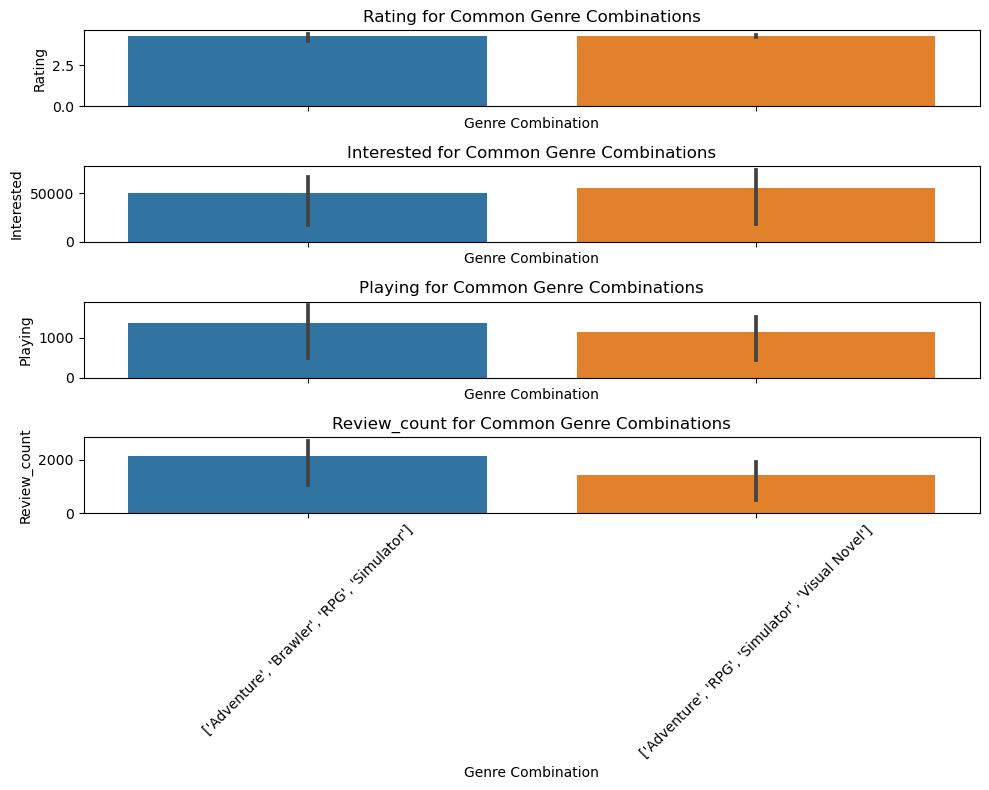

In [118]:
# Get the top genre combinations for each numerical variable
top_genre_combinations = {}
for variable in numerical_variables:
    genre_average = popular_Genre.groupby('Genres')[variable].mean().reset_index()
    top_genre_combinations[variable] = genre_average.sort_values(by=variable, ascending=False).head(20)['Genres'].tolist()

# Find the common genre combinations
common_genre_combinations = set(top_genre_combinations[numerical_variables[0]])
for variable in numerical_variables[1:]:
    common_genre_combinations.intersection_update(top_genre_combinations[variable])

# Filter the genre average data for the common genre combinations
common_genre_average = popular_Genre[popular_Genre['Genres'].isin(common_genre_combinations)]

# Plot the common genre combinations for each numerical variable
fig, axes = plt.subplots(len(numerical_variables), figsize=(10, 8), sharex=True)
for i, variable in enumerate(numerical_variables):
    sns.barplot(x='Genres', y=variable, data=common_genre_average, ax=axes[i])
    axes[i].set_title(f'{variable} for Common Genre Combinations')
    axes[i].set_ylabel(variable)
    axes[i].set_xlabel('Genre Combination')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



[Adventure, Brawler, RPG, simulator]: This combination indicates a blend of exploration and action (Adventure, Brawler), character progression and storytelling (RPG), and immersive, true-to-life experiences (Simulator). Games in this category offer a mix of dynamic gameplay, narrative depth, and realistic simulation, catering to players who enjoy diverse gaming experiences with a focus on character-driven narratives and immersive worlds.

[Arcade, RPG, Visual Novel, simulator]: This combination suggests a preference for fast-paced, skill-based gameplay (Arcade), character-driven narratives and progression (RPG), interactive storytelling (Visual Novel), and immersive simulation experiences (Simulator). Games featuring these elements offer a blend of nostalgic arcade fun, rich storytelling, and immersive simulation, appealing to players looking for diverse and engaging gaming experiences.


# What are the trends/genres game companies or game developers can focus on to develope a games that would become popualr based on current player engagement, ratings and interest?

# Process

At the start, finding variables with high correlation with one another that could help anaylse what makes games popular was difficult. The only variable that game developers can focus on changing or adapting is the genre of the games in the dataset. EDA findings showed that both genre combinations and each respective genre did not have a high correlation or relationship with any of the numerical variables that could help to indicate if the game was popular.

Hence, we decided to find possible patterns to help group the games into 3 groups, low, medium, and high popularity.

However, before that , we wanted to try using NLP and sentient analysis to get the summary of the games that are associated with good reviews, then extract keywords from the summary and use TFIDF to be able to use the keywords found in the summary for logistics regression.

Clustering was valuable for grouping similar data points based on their numerical features, such as popularity metrics in the context of video games. While we were able to get an idea of which genre belonging to the respective cluster was popular, since it was not clustered based on the category genre itself, we wanted to get a more meaningful evaluation of which genres according to the summary of the game. (provides insights on what content the game contains)

our logistic regression models incorporated both the TF-IDF matrix derived from game summaries and the cluster groups to help predict which keywords might show what kind of content attracts or appeals to players, making the game popular.

Then we extracted the genres associated with the summaries with the top 10 key features to find what combination of genres currently makes people attracted to the games.

# CONCLUSION

By analyzing patterns and trends in the evolution of video game genres and using regression models and Natural Language Processing, it's possible to gain insights into factors contributing to a genre's popularity. The consistent appearance of genres like Adventure and RPG in top combinations suggests a preference for immersive storytelling and character-driven gameplay. Additionally, genres such as Brawler, Simulation, Arcade, and Visual Novels, when combined with Adventure and RPG, can increase a game's appeal.

Game developers are encouraged to create games with a blend of genres, incorporating Adventure and RPG alongside Brawler, Simulation, Arcade and Visual Novels. This approach can lead to the development of more unique and diverse gaming experiences, catering to a broader audience. Combining genres not only enhances gameplay but also increases the chances of creating innovative and engaging games.

For example, integrating the Arcade genre into an RPG with storytelling features appeals to players seeking both narrative-driven experiences and nostalgic elements. This approach ensures that games offer diverse and unique experiences, meeting the varied tastes and interests of modern gamers.
